# matplotlib API 간략히 살펴보기

In [3]:
%matplotlib notebook

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data=np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


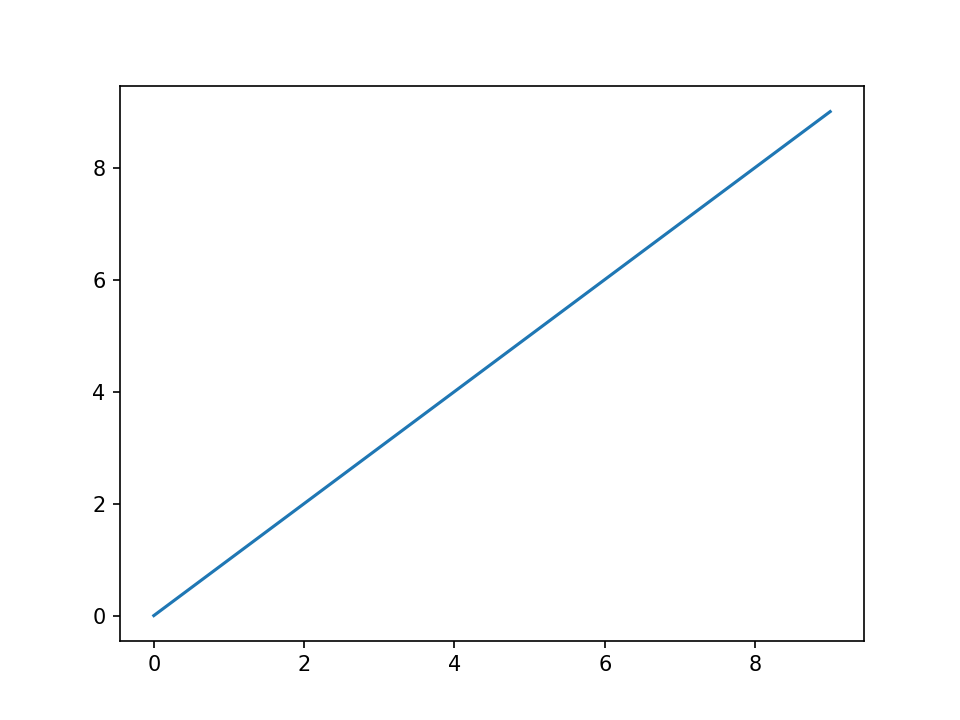

In [6]:
plt.plot(data)

* figure와 서브플롯

<IPython.core.display.Javascript object>


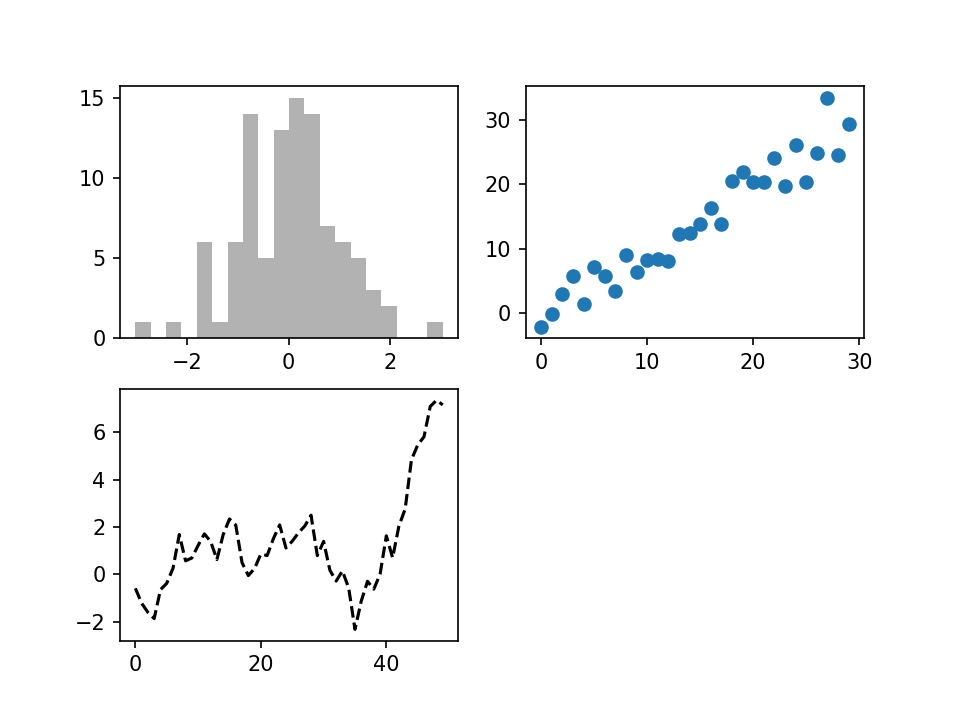

In [7]:
# matplotlib에서 그래프는 Figure 객체 내에서 존재

fig =plt.figure() # plt.figure()을 사용하여 그래프를 위한 새로운 figure 생성

In [8]:
# add_subplot을 사용하여 최소 하나 이상의 subplots생성

ax1=fig.add_subplot(2,2,1) # figure이 2*2크기이고, 4개의 서브플롯 중 첫번째를 선택하겠다는 의미

In [9]:
ax2=fig.add_subplot(2,2,2)

In [10]:
ax3=fig.add_subplot(2,2,3)

In [11]:
plt.plot(np.random.randn(50).cumsum(),'k--') #'k--'는 검은 점선을 그리기 위한 스타일 옵션

In [12]:
_=ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)

In [13]:
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

<IPython.core.display.Javascript object>


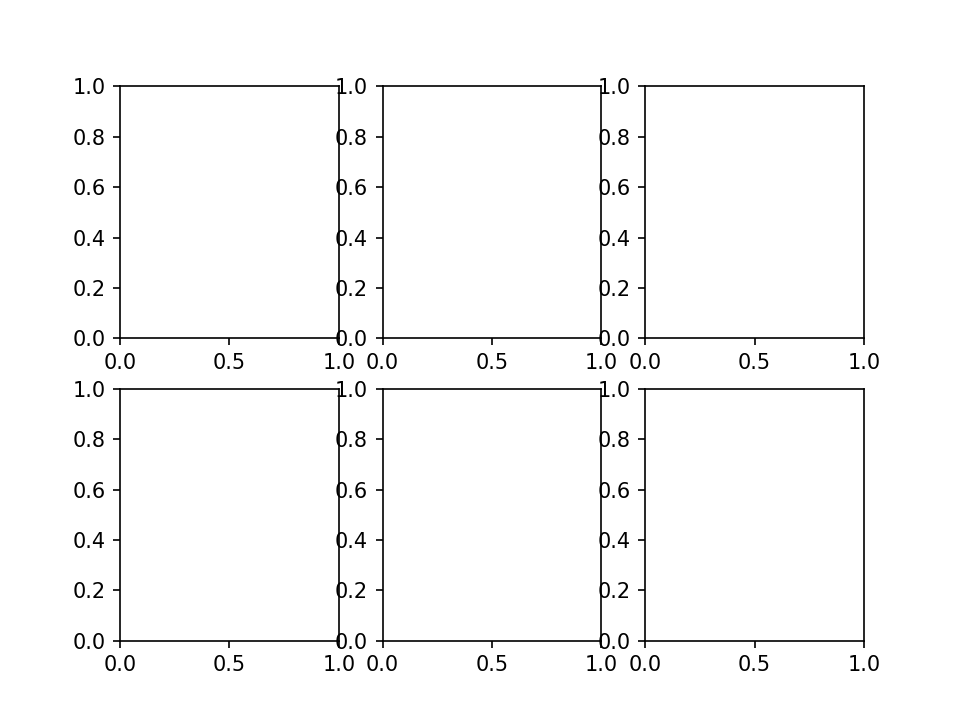

In [14]:
figs,axes=plt.subplots(2,3) # 특정 배치에 맞춰 여러 개의 서브플롯을 포함하는 figure를 생성, Numpy배열과 서브플롯 객체를 새로 생성

In [15]:
axes # axes[0,1]처럼 2차원 배열로 쉽게 색인 될 수 있어 편리하게 사용 가능 
     # 서브플롯이 같은 x축 혹은 y축을 가져야한다면 각각 sharex와 sharey를 사용하여 지정 가능

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [16]:
# 서브플롯 간의 간격 조절하기: 
# subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

<IPython.core.display.Javascript object>


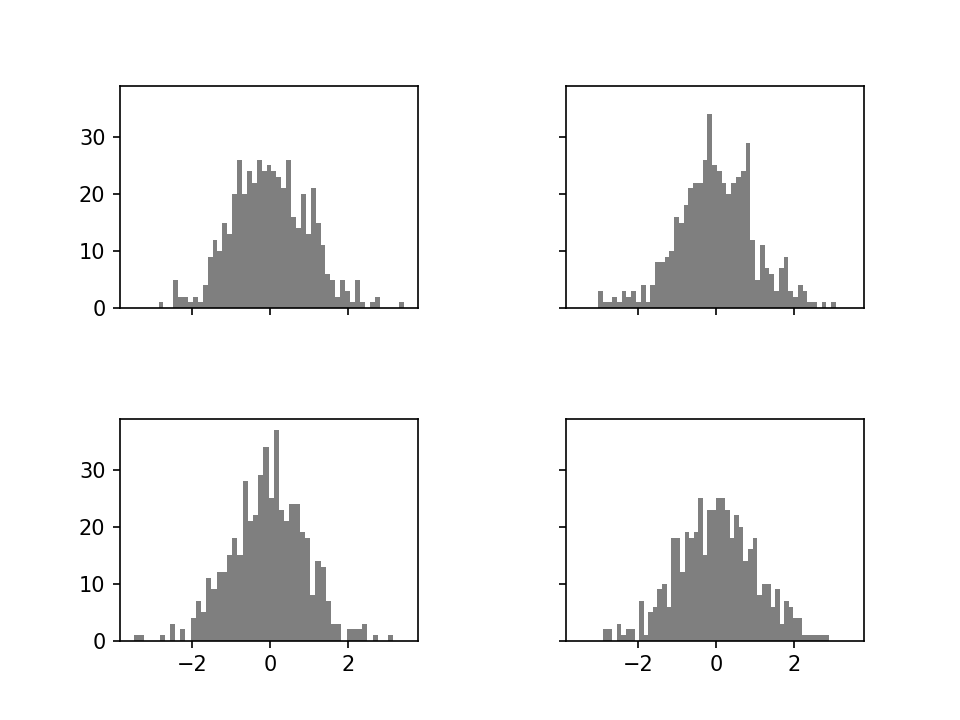

In [17]:
fig,axes=plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0.5,hspace=0.5)

* 색상, 마커, 선 스타일

In [18]:
from numpy.random import randn

<IPython.core.display.Javascript object>


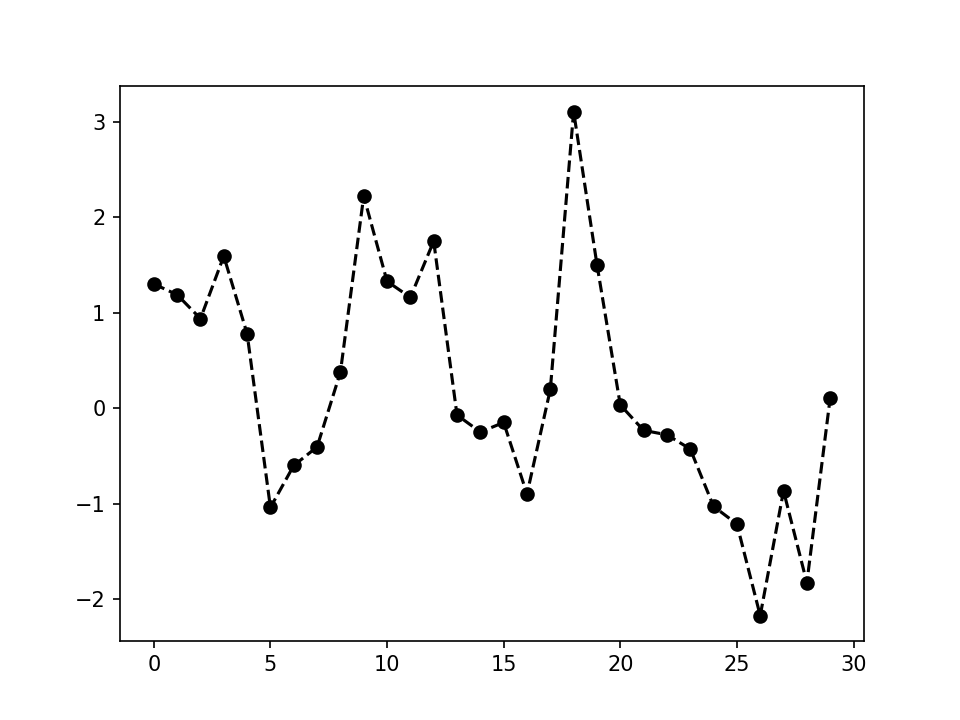

In [19]:
plt.subplots()
plt.plot(randn(30).cumsum(),'ko--')

<IPython.core.display.Javascript object>


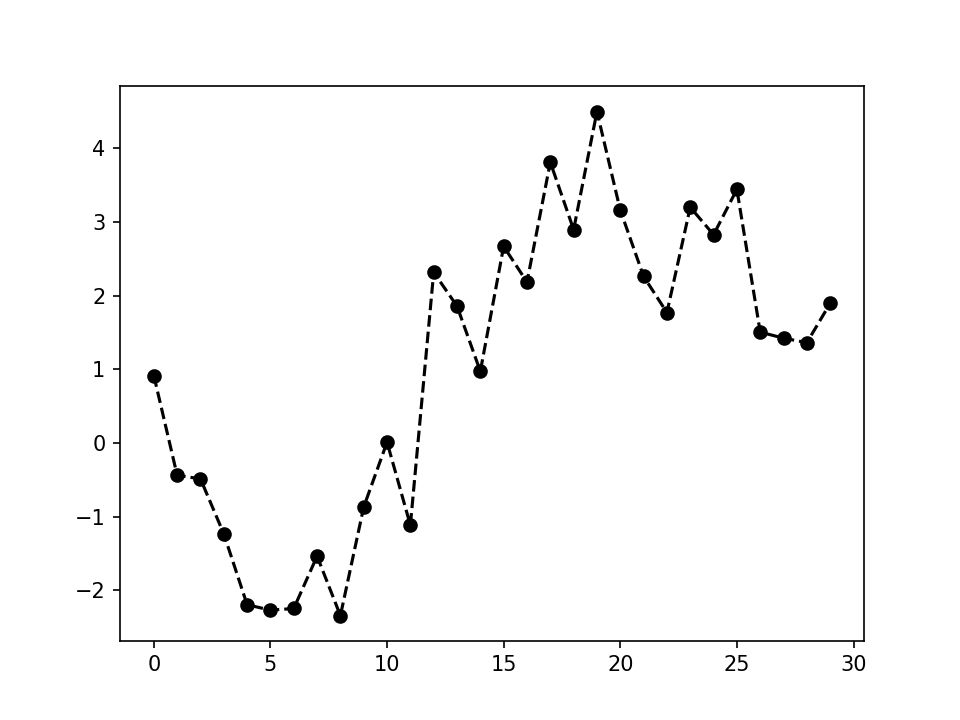

In [20]:
plt.subplots()
plt.plot(randn(30).cumsum(), color='k',linestyle='dashed',marker='o')

In [21]:
data=randn(30).cumsum()

<IPython.core.display.Javascript object>


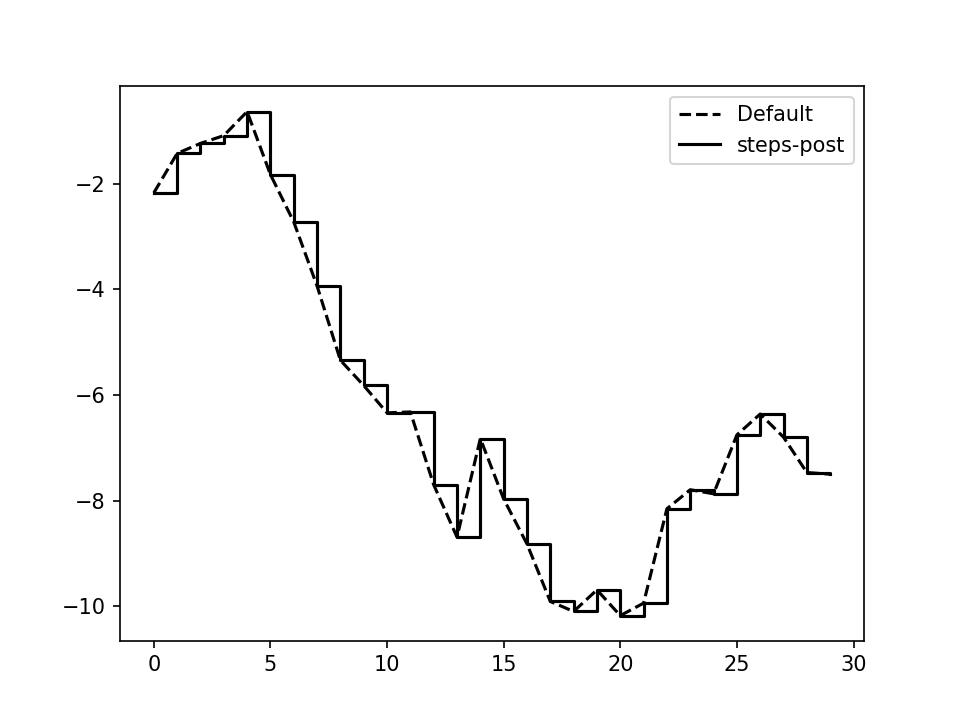

In [22]:
plt.subplots()
plt.plot(data,'k--',label='Default')

In [23]:
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post') # drawstyle 옵션으로일정한 간격으로 연속된 지점이 연결되어 있는 것을 바꿈

In [24]:
plt.legend(loc='best') # plt.legend를 이용하여 선그래프의 범례 추가

* 눈금, 라벨, 범례

<IPython.core.display.Javascript object>


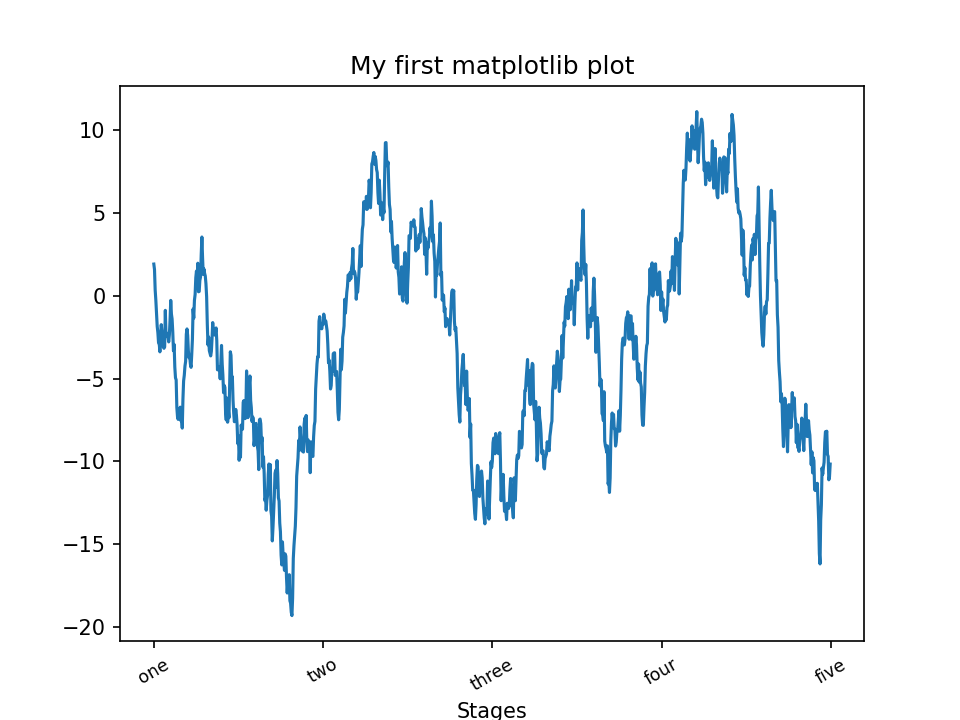

In [25]:
# 제목, 축 이름, 눈금, 눈금 이름 설정하기

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

In [26]:
ticks=ax.set_xticks([0,250,500,750,1000])
labels=ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='small')
# set_xticks와 set_xticklabels를 사용하여 x축 눈금과 이름 변경

In [27]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
# set_xlabel메서드는 x축에 대한 이름, set_title메서드는 서브플롯의 제목 지정

Text(0.5, 0, 'Stages')

<IPython.core.display.Javascript object>


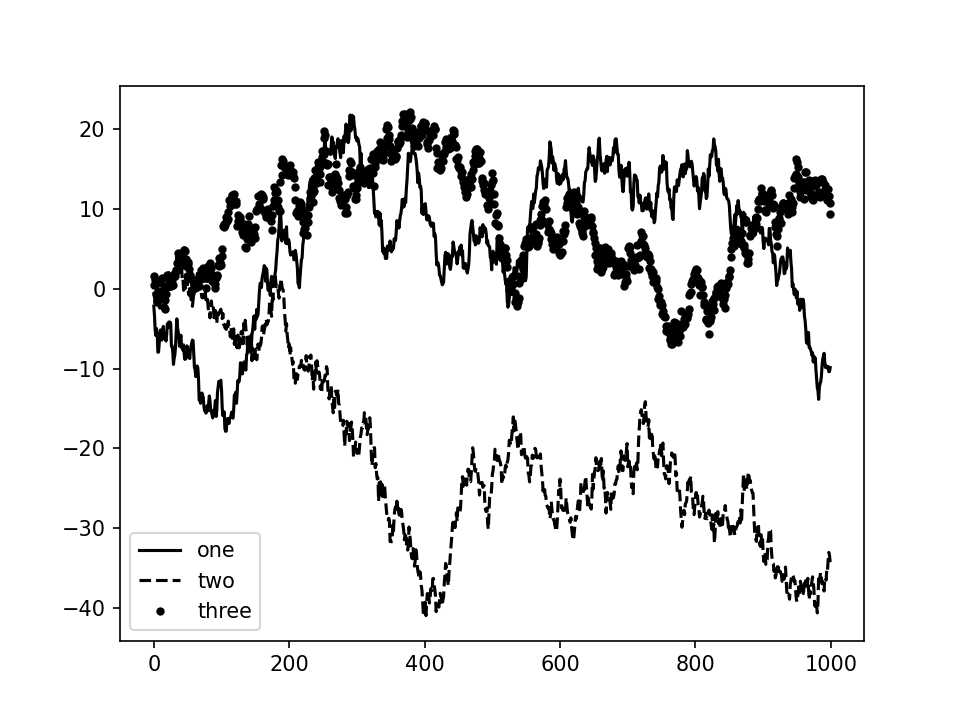

In [28]:
# 범례 추가하기

fig=plt.figure(); ax=fig.add_subplot(1,1,1)

In [29]:
ax.plot(randn(1000).cumsum(),'k',label='one')

In [30]:
ax.plot(randn(1000).cumsum(),'k--',label='two')

In [31]:
ax.plot(randn(1000).cumsum(),'k.',label='three')

In [32]:
ax.legend(loc='best') # ax.legend()나 plt.legend()를 실행하면 범례 생성

* 주석과 그림 추가하기

<IPython.core.display.Javascript object>


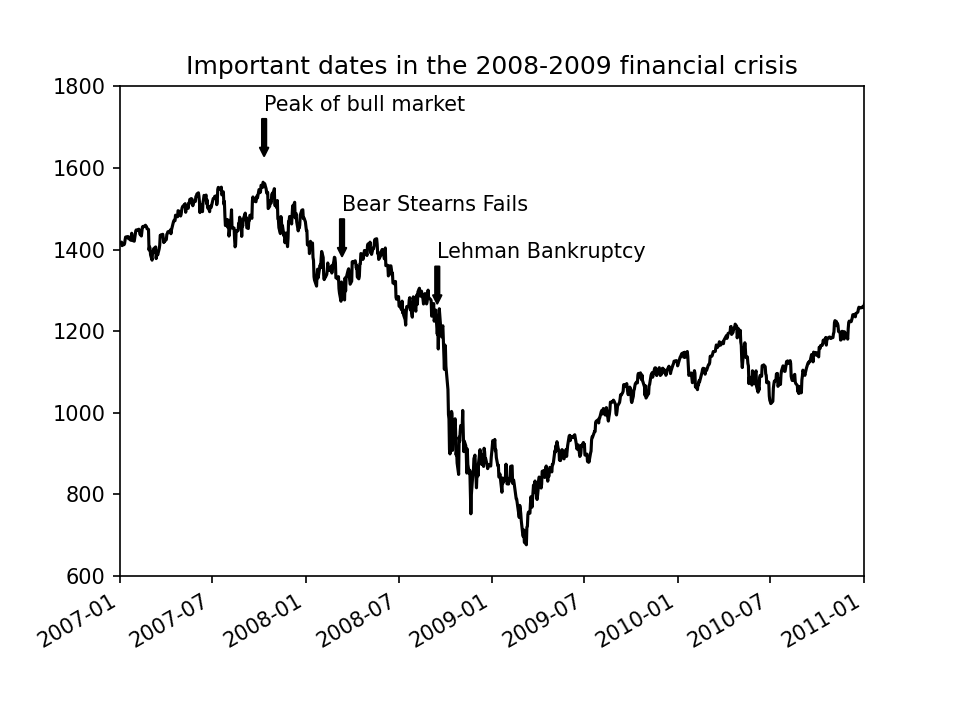

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [33]:
from datetime import datetime
import pandas as pd

fig=plt.figure(); ax=fig.add_subplot(1,1,1)

data=pd.read_csv('examples/spx.csv',index_col=0,parse_dates=True)
spx=data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data=[
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date,spx.asof(date)+75), # ax.annotate메서드를 이용해 x,y좌표로 지정한 위치에 라벨 추가
               xytext=(date,spx.asof(date)+225),
               arrowprops=dict(facecolor='black', headwidth=4,width=2,headlength=4),
               horizontalalignment='left',
               verticalalignment='top')
#2007-2010 구간으로 확대
ax.set_xlim(['1/1/2007','1/1/2011']) # set_xlim과 set_ylim메서드를 이용해 그래프의 시작과 끝 경계를 직접 지정
ax.set_ylim([600,1800])
ax.set_title('Important dates in the 2008-2009 financial crisis') # set_title메서드로 그래프의 제목 지정

<IPython.core.display.Javascript object>


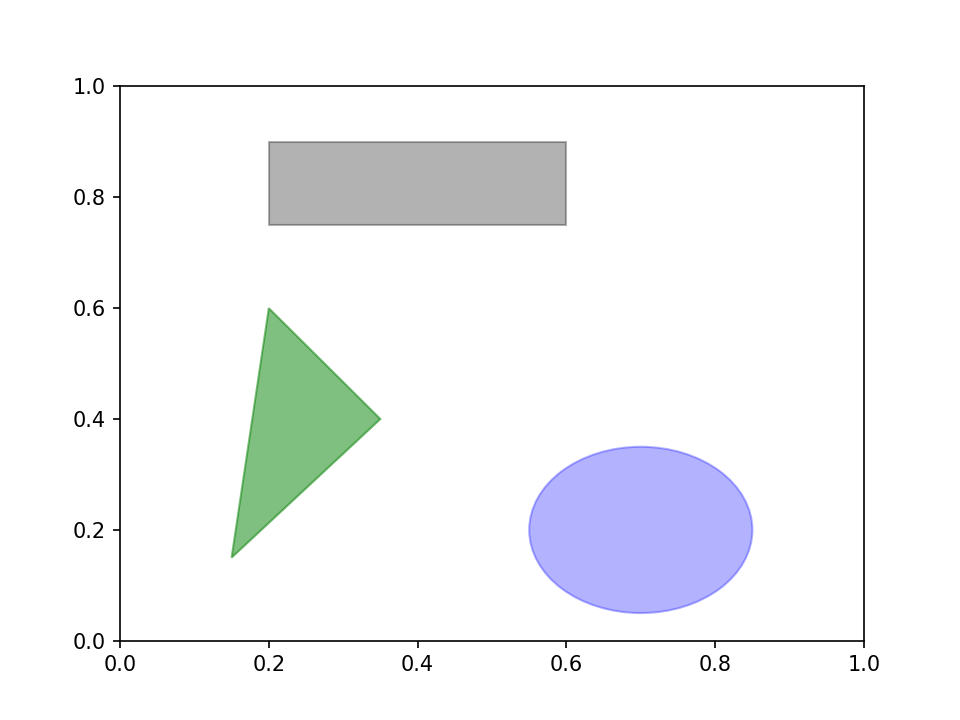

In [34]:
# matplotlib는 일반적인 도형을 표현하기 위한 patches라는 객체 제공

fig=plt.figure(); ax=fig.add_subplot(1,1,1)

rect=plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)
circ=plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
pgon=plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

* 그래프를 파일로 저장하기

In [35]:
plt.savefig('figpath.svg') 
# 활성화된 figure는 plt.savefig메서드를 이용하여 파일로 저장가능, figure객체의 인스턴스 메서드인 savefig과 동일

In [36]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
# dpi는 인치당 도트 해상도를 조절하고 bbox_inches는 실제 figure 둘레의 공백을 잘라냄

In [37]:
from io import BytesIO
buffer=BytesIO()
plt.savefig(buffer) # savefig메서드는 BytesIO처럼 파일과 유사한 객체에 저장하는 것도 가능
plot_data=buffer.getvalue()

* matplotlib 설정

In [38]:
plt.rc('figure',figsize=(10,10))
# rc메서드를 사용해서 프로그래밍적으로 설정

In [39]:
font_options={'family': 'monospace',
             'weight':'bold'}
plt.rc('font',**font_options)

# pandas에서 seaborn으로 그래프 그리기

* 선그래프

<IPython.core.display.Javascript object>


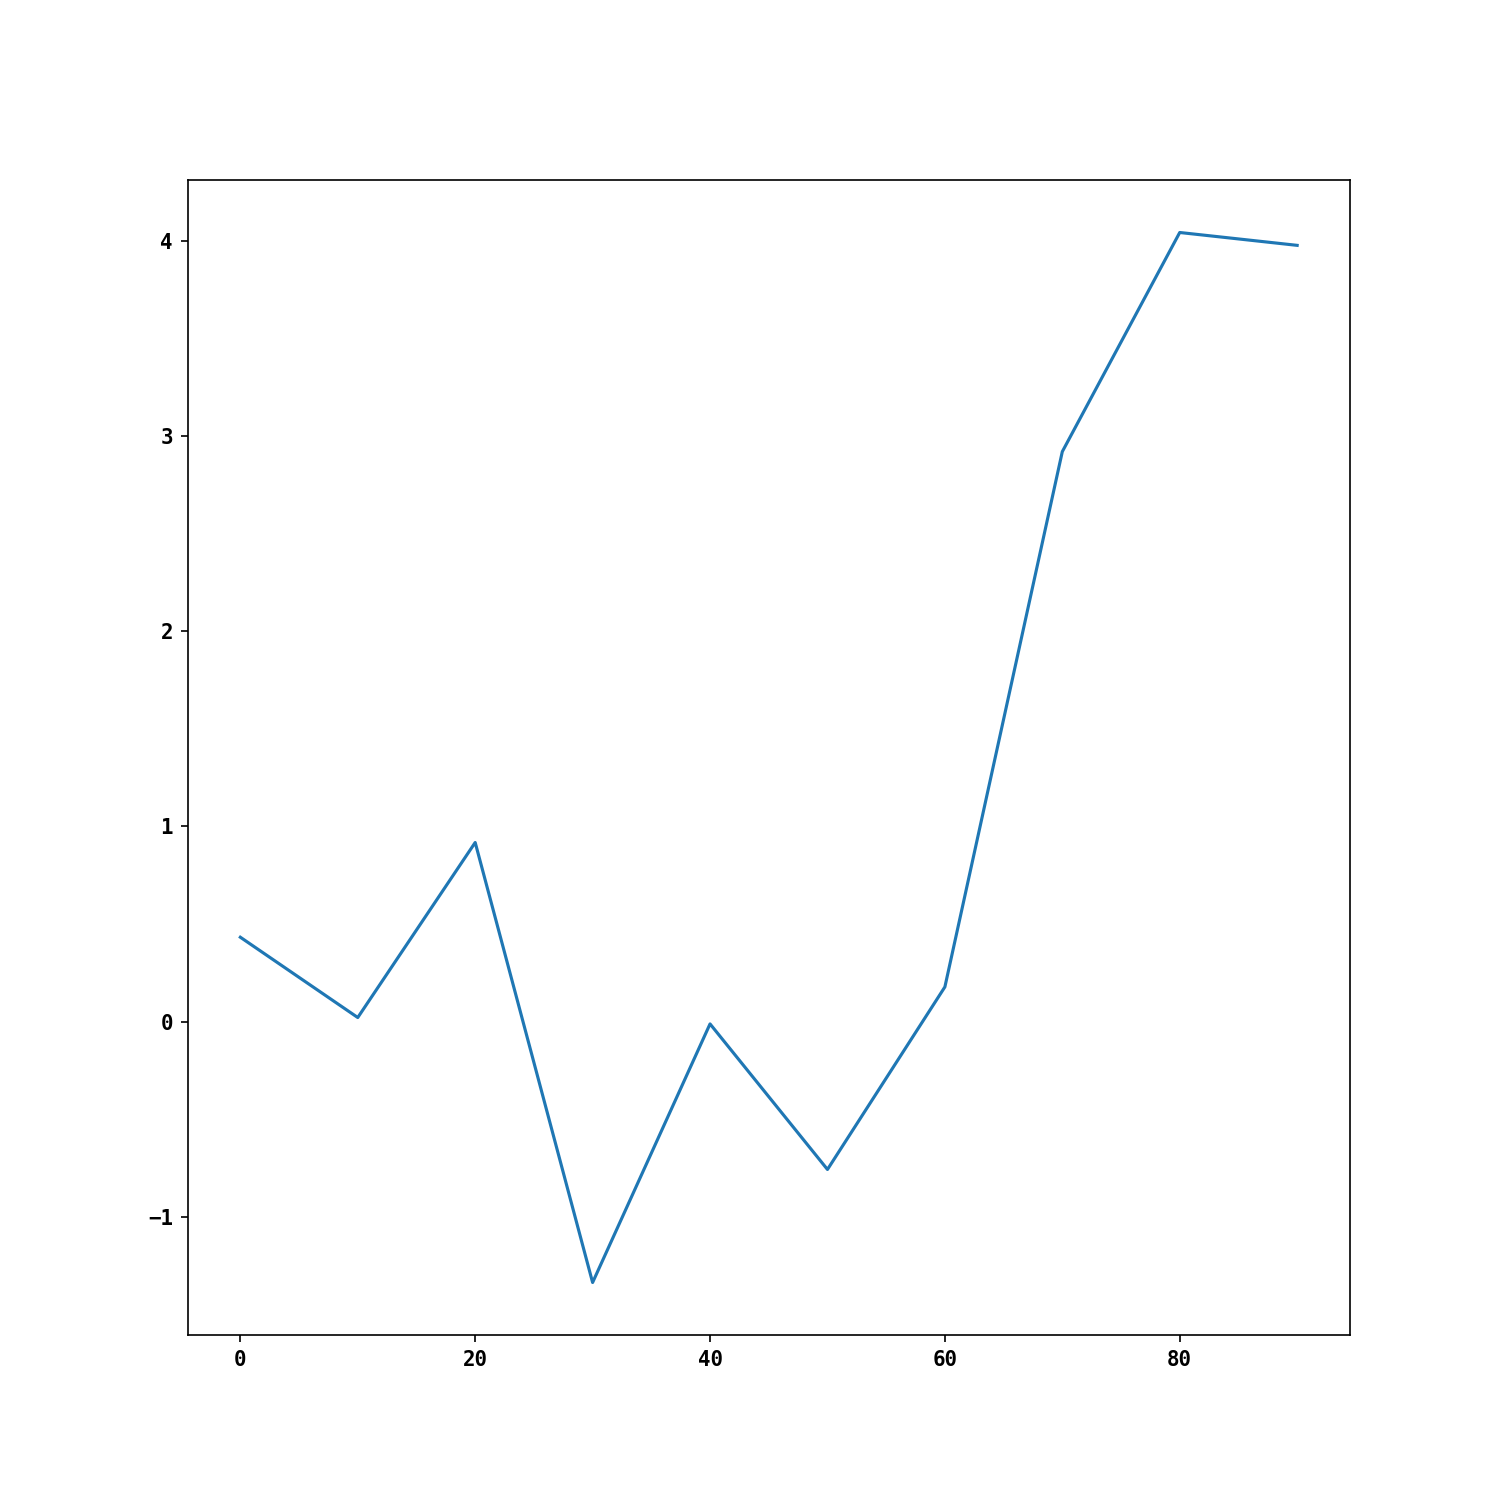

<AxesSubplot:>

In [40]:
fig=plt.figure(); ax=fig.add_subplot(1,1,1)
s=pd.Series(randn(10).cumsum(), index=np.arange(0,100,10)) 
# Series객체의 색인은 matplotlib에서 그래프를 생성할 때 x축으로 해석, use_index=False옵션을 넘겨 사용을 안할 수 있음
s.plot()

<IPython.core.display.Javascript object>


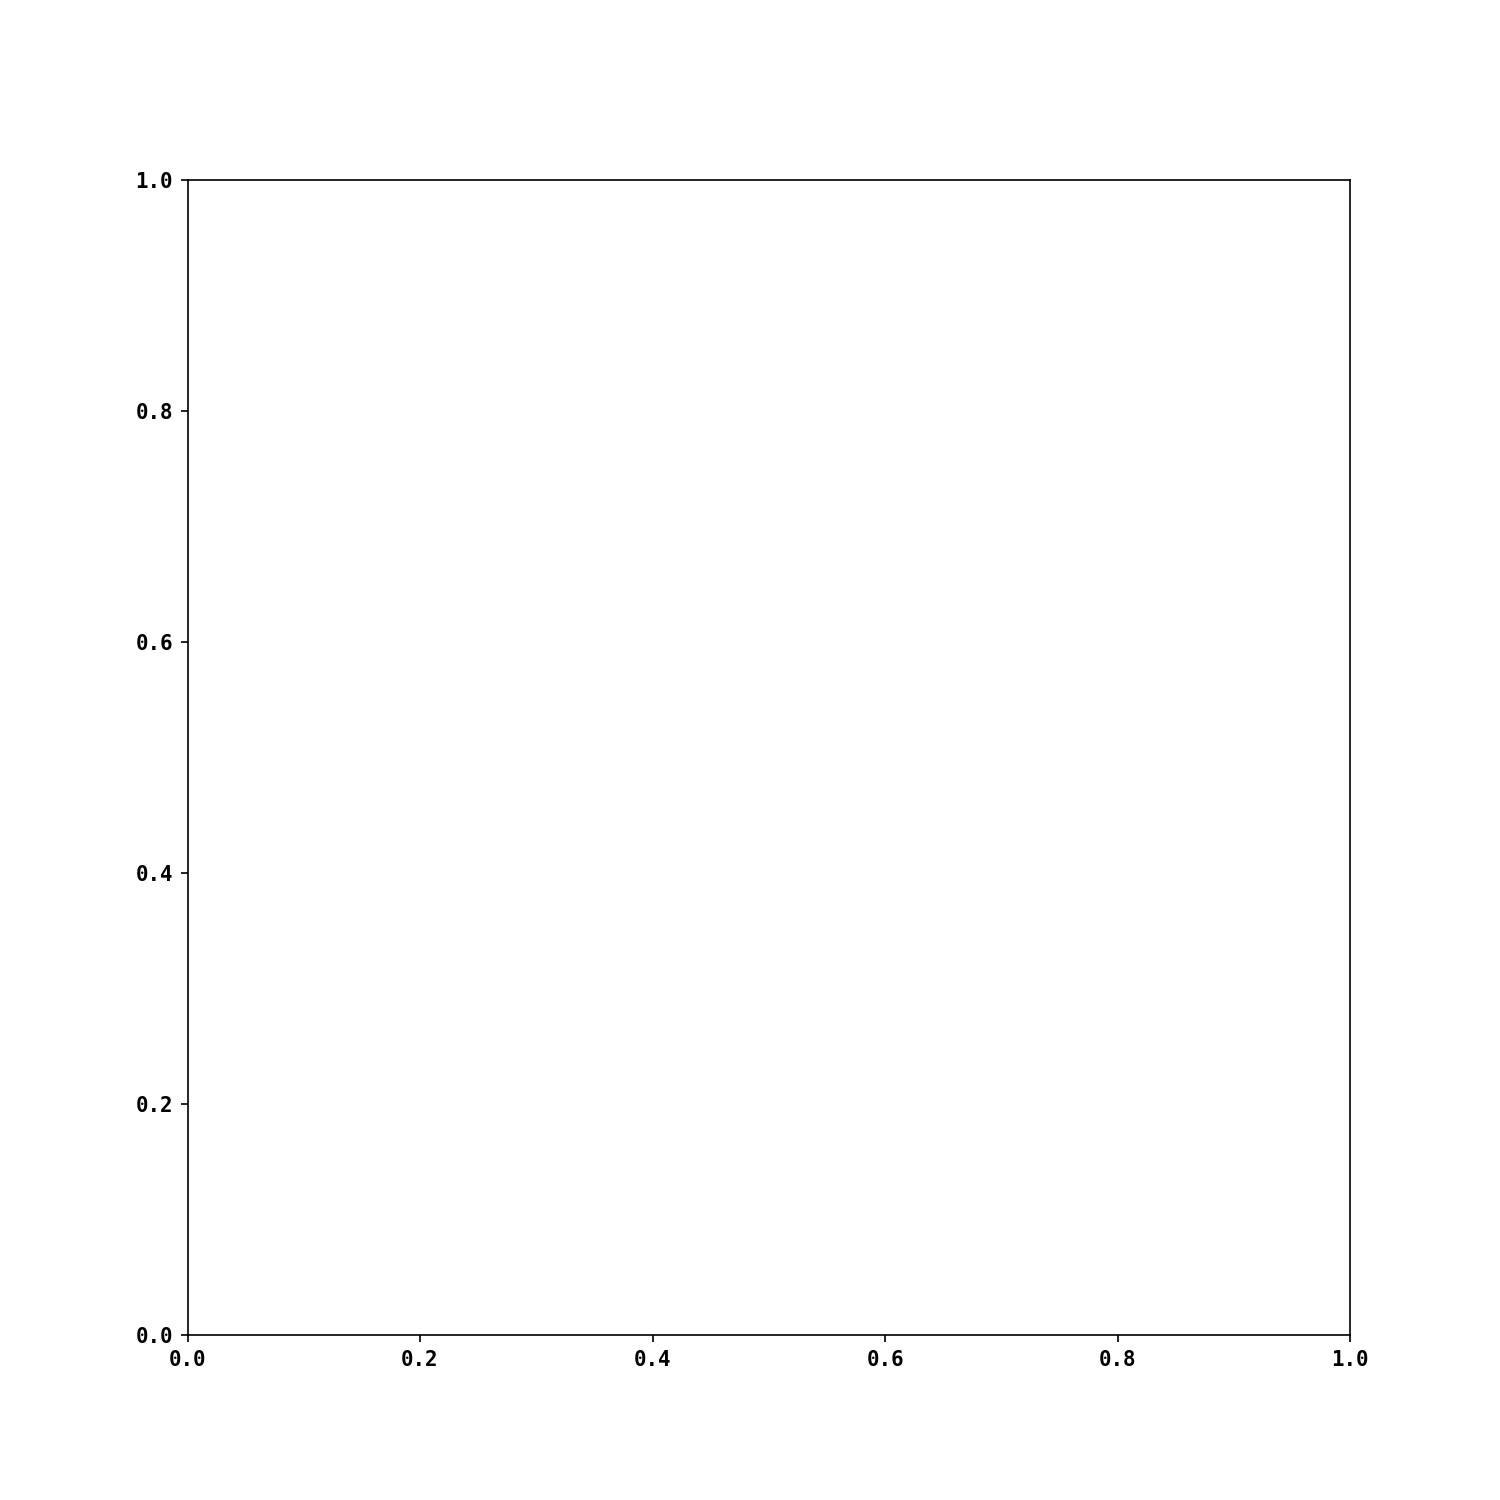

<IPython.core.display.Javascript object>


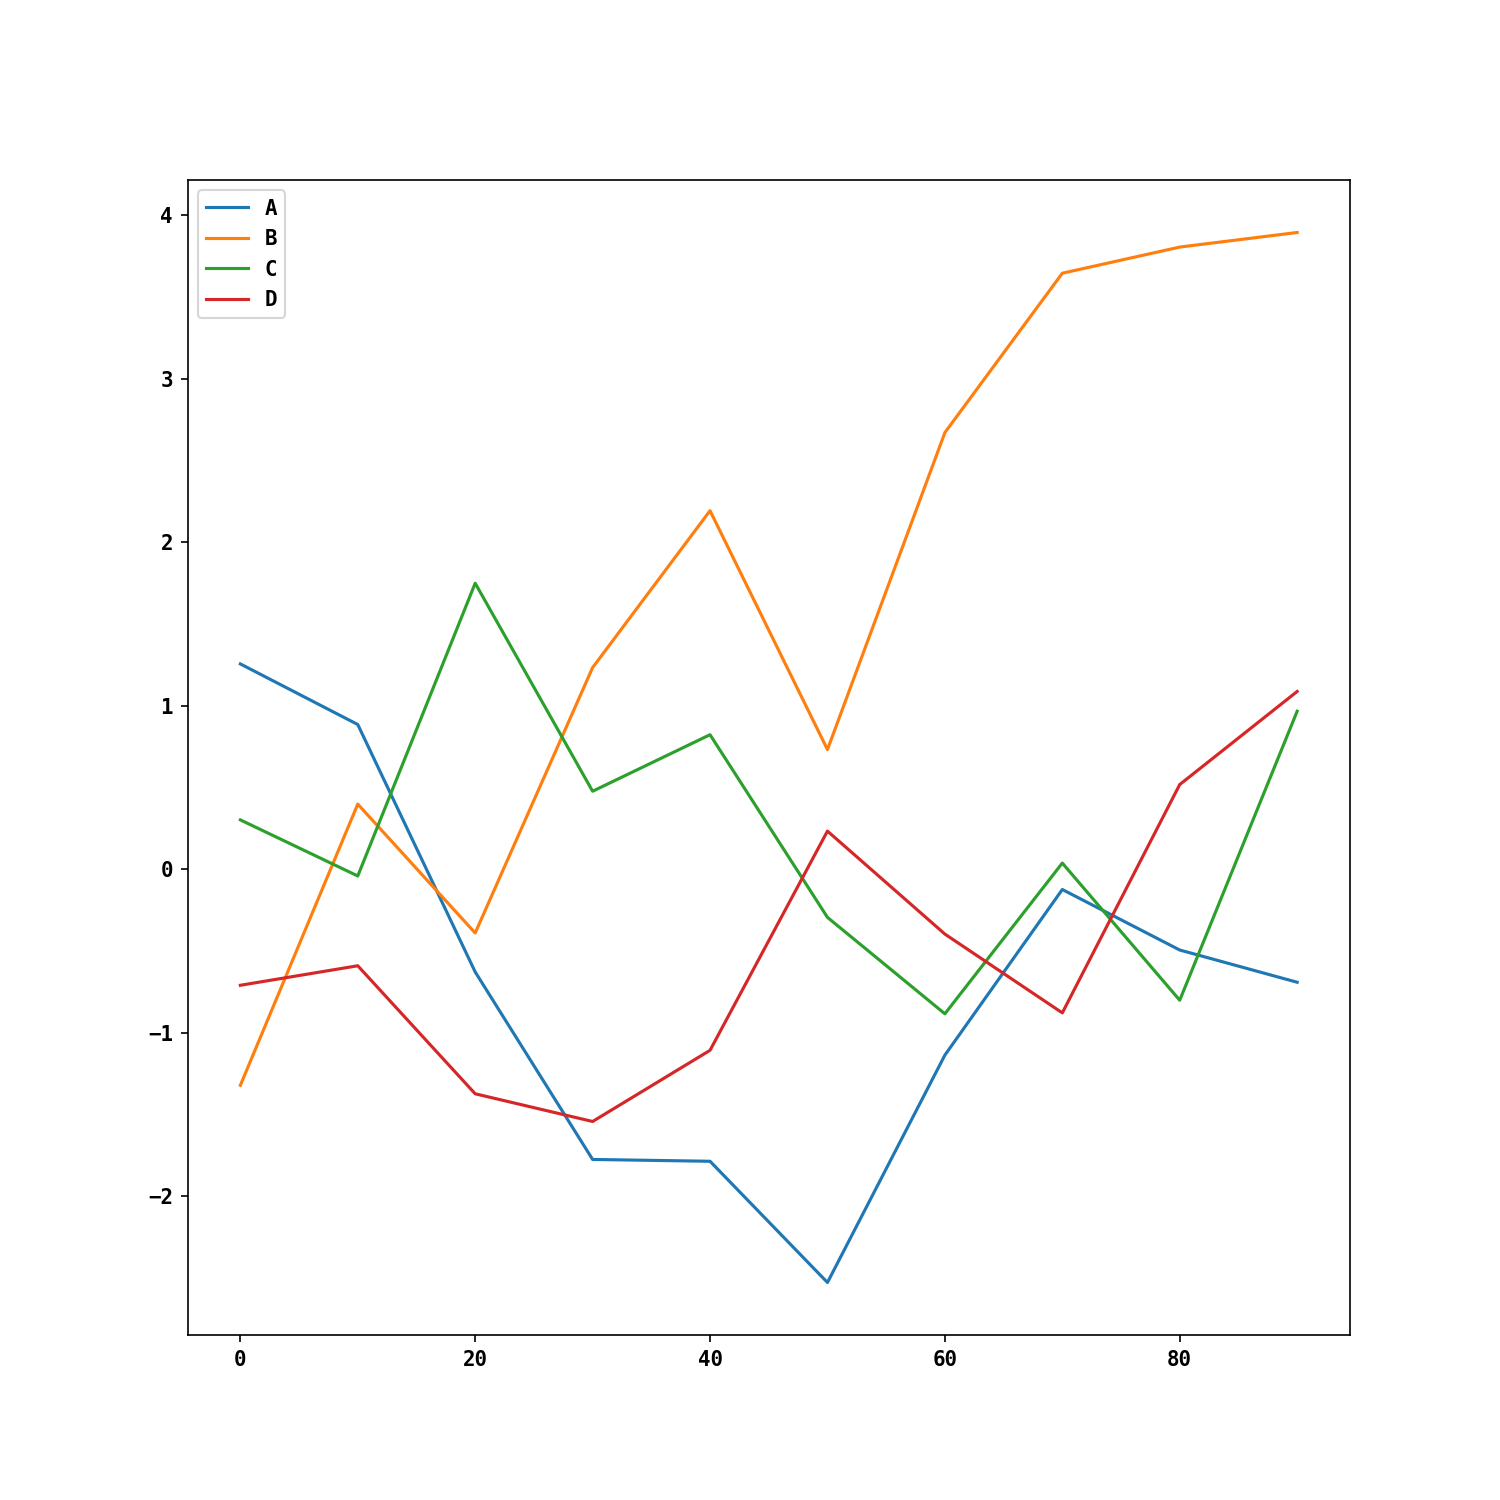

<AxesSubplot:>

In [41]:
fig=plt.figure(); ax=fig.add_subplot(1,1,1)
df=pd.DataFrame(randn(10,4).cumsum(0),
               columns=['A','B','C','D'],
               index=np.arange(0,100,10))
df.plot() # DF의 plot메서드는 하나의 서브플롯 안에 각 컬럼별로 선그래프를 그리고 자동으로 범례 생성

* 막대그래프

<IPython.core.display.Javascript object>


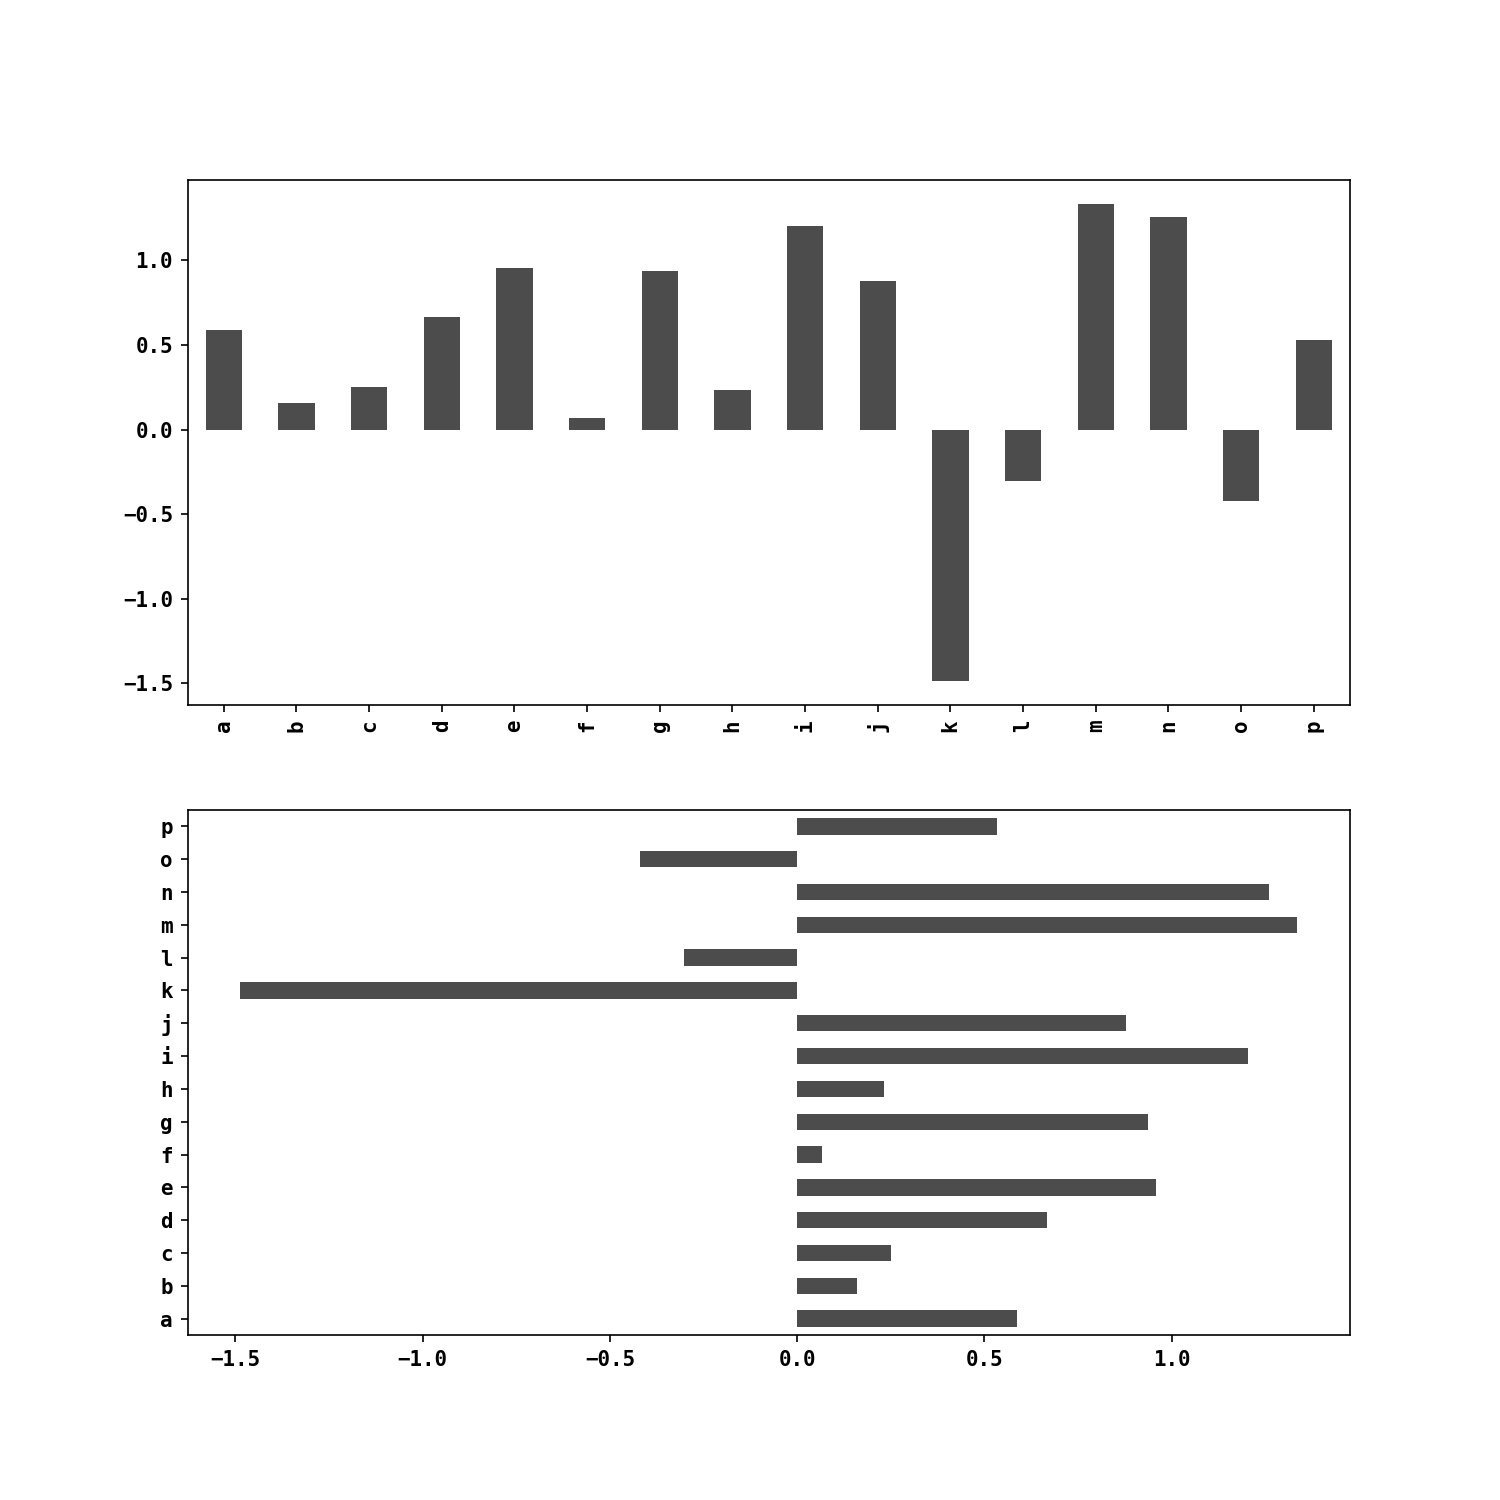

In [42]:
figs,axes=plt.subplots(2,1)

In [43]:
data=pd.Series(randn(16), index=list('abcdefghijklmnop'))

In [44]:
data.plot.bar(ax=axes[0],color='k',alpha=0.7)

<AxesSubplot:>

In [45]:
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

<AxesSubplot:>

In [46]:
df=pd.DataFrame(randn(6,4),
               index=['one','two','three','four','five','six'],
               columns=pd.Index(['A','B','C','D'], name='Genus'))
df # DF에서 막대그래프는 각 로우의 값을 함께 묶어서 하나의 그룹마다 각각의 막대를 보여준다

Genus         A         B         C         D
one    0.382679  0.153684  0.170273  0.193202
two   -0.010274  0.244681  0.353053  0.495419
three -1.069896 -1.732009 -0.839071 -1.180139
four  -0.046234  0.268787 -0.239239 -0.245166
five  -1.386470 -0.216029  0.965836  0.179653
six   -0.291438 -0.341044  1.613025 -0.046030

<IPython.core.display.Javascript object>


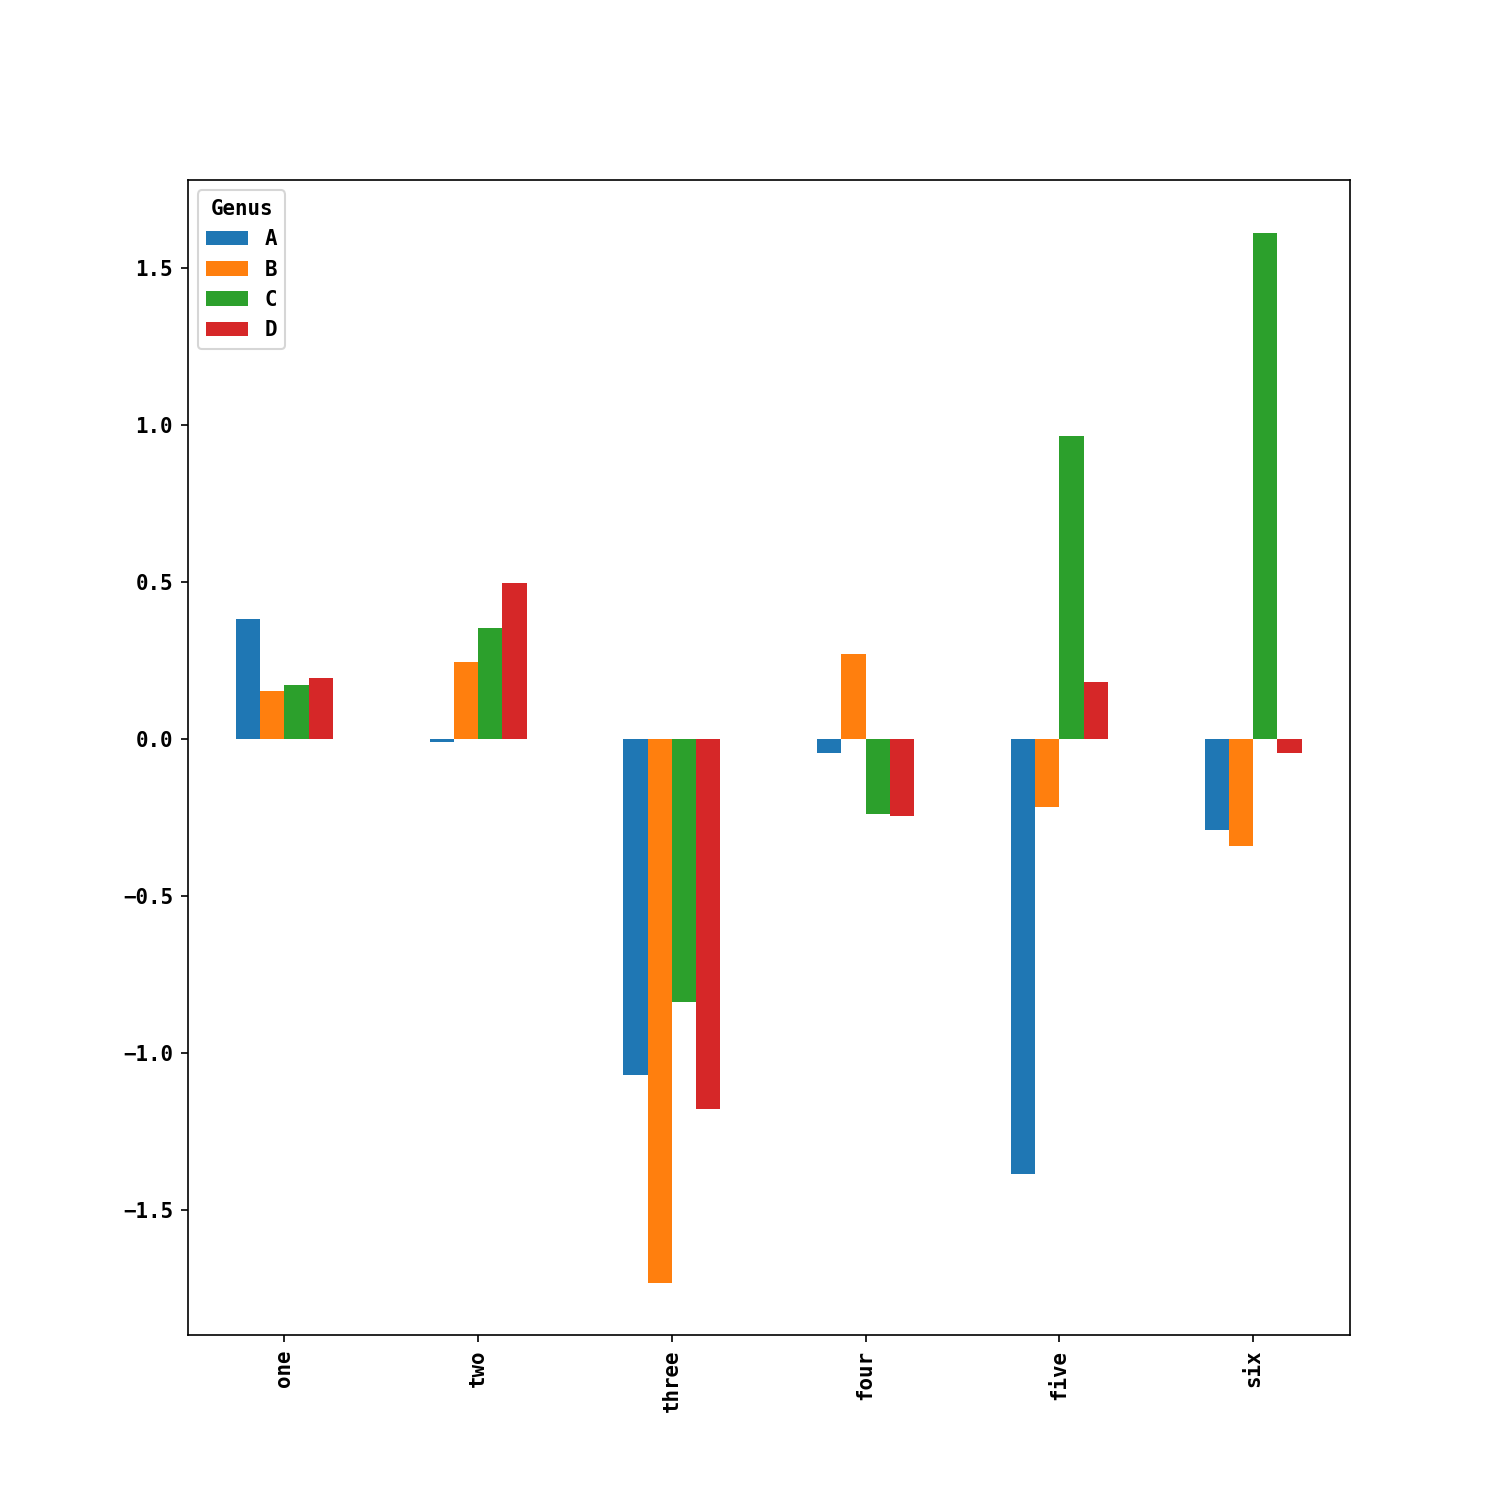

<AxesSubplot:>

In [47]:
df.plot.bar()

<IPython.core.display.Javascript object>


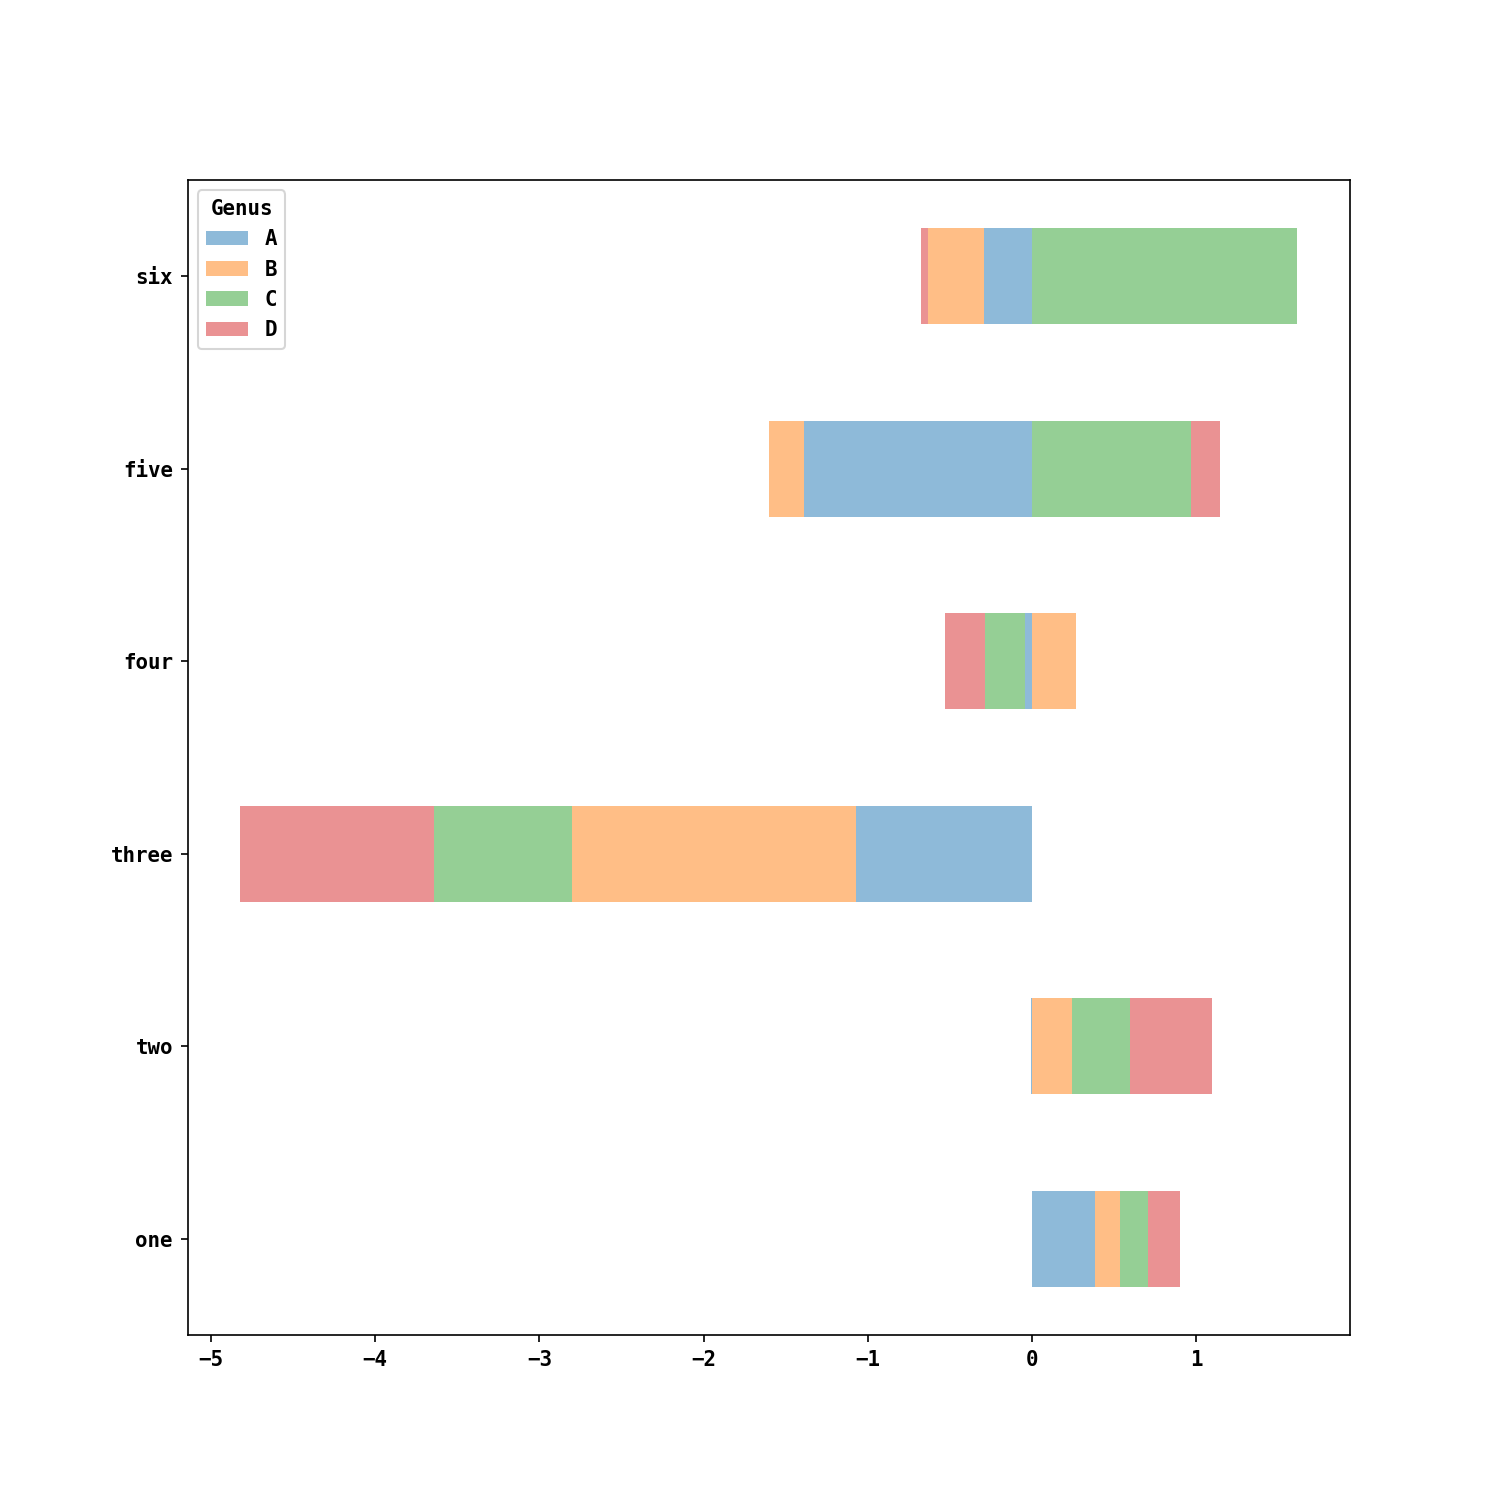

<AxesSubplot:>

In [48]:
df.plot.barh(stacked=True, alpha=0.5) # 누적막대그래프는 stacked=True옵션을 사용해서 생성

In [49]:
tips=pd.read_csv('examples/tips.csv')

In [50]:
party_counts=pd.crosstab(tips['day'],tips['size'])

In [51]:
party_counts

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

In [52]:
party_counts=party_counts.loc[:,2:5] # 1인과 6인 파티는 제외

In [53]:
party_pcts=party_counts.div(party_counts.sum(1),axis=0) # 각 로우의 합이 1이 되도록 정규화
party_pcts

size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241

<IPython.core.display.Javascript object>


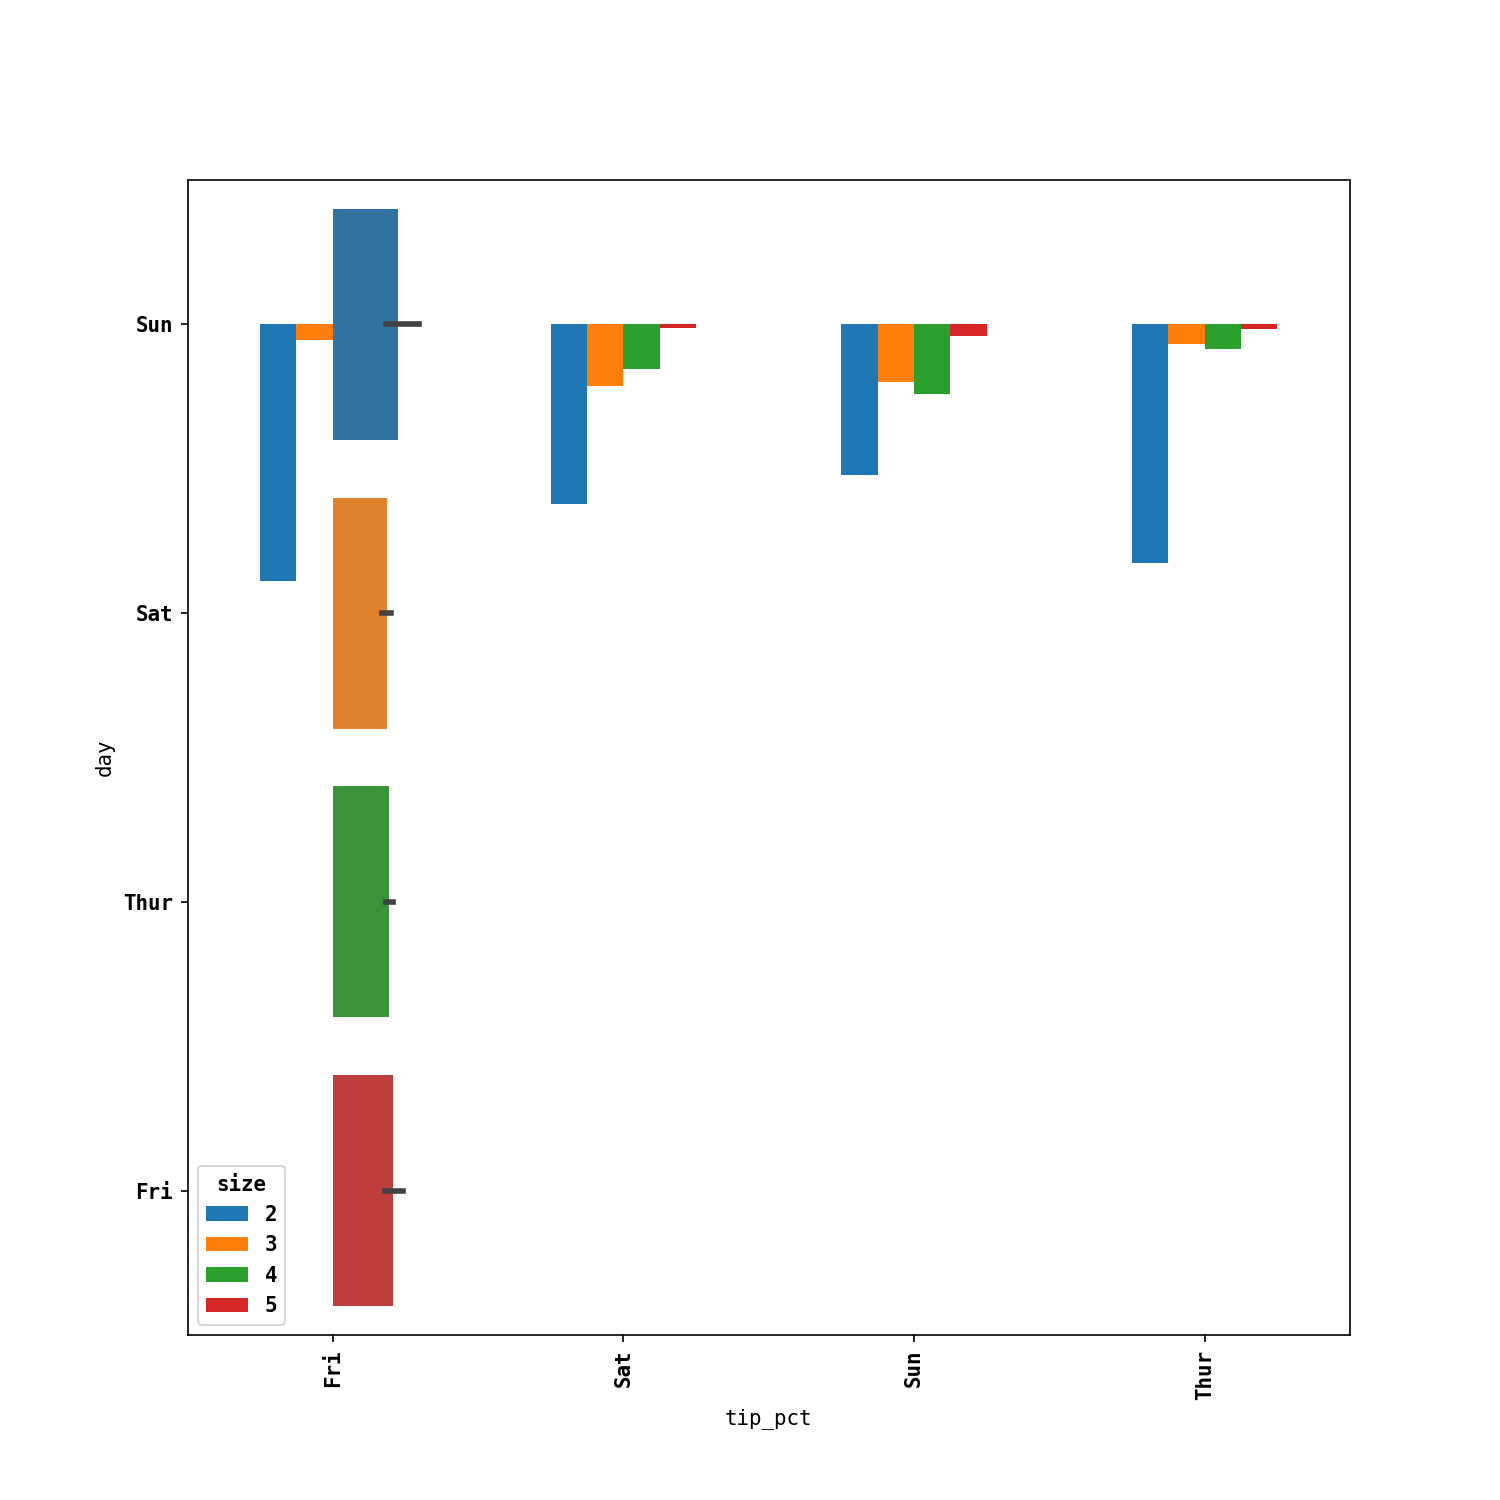

<AxesSubplot:xlabel='day'>

In [60]:
party_pcts.plot.bar()

In [90]:
import seaborn as sns # seaborn패키지로 팁데이터를 더 간단히 그림

In [73]:
tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip'])

In [74]:
tips.head()

total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069

<IPython.core.display.Javascript object>


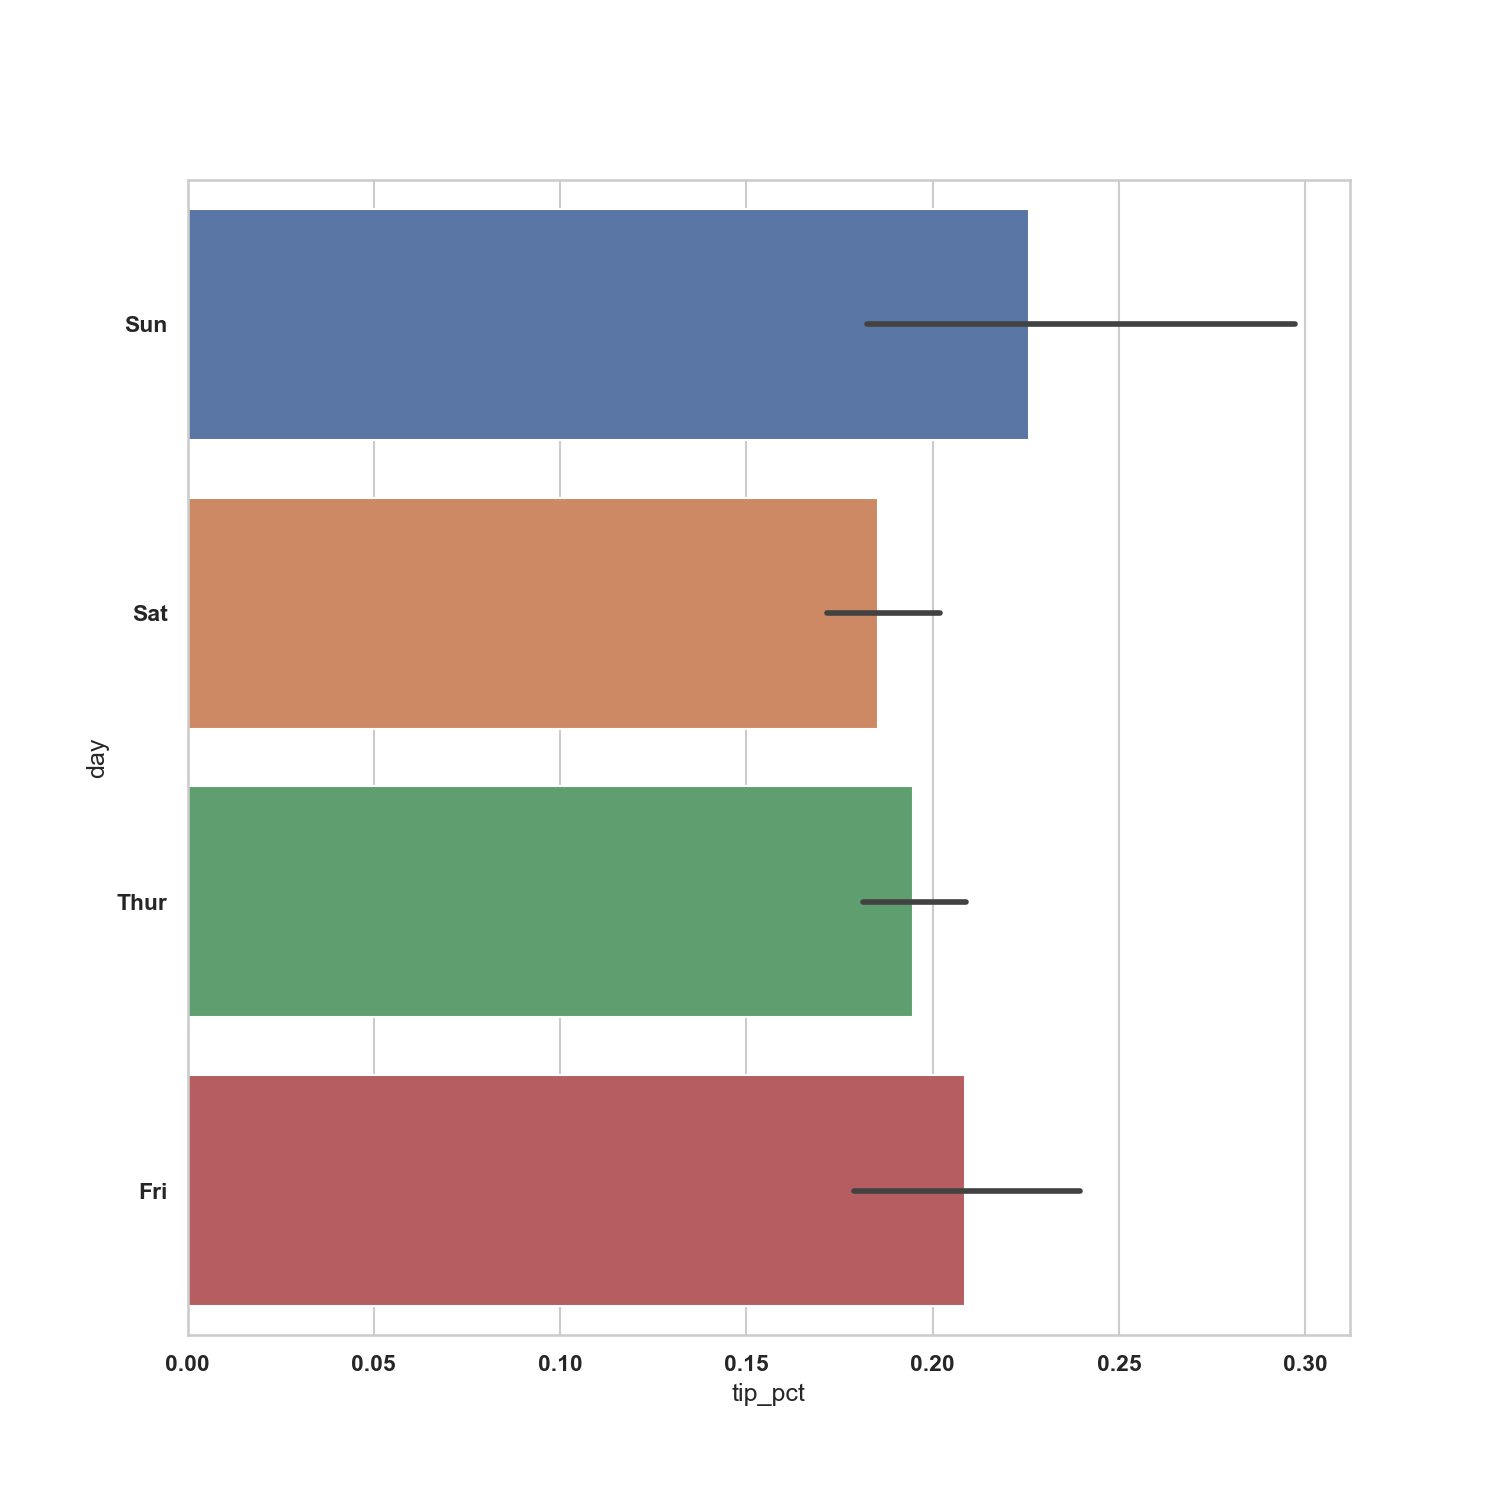

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [79]:
plt.subplots()
sns.barplot(x='tip_pct',y='day',data=tips,orient='h')

In [76]:
sns.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [77]:
sns.set(style='whitegrid')

* 히스토그램과 밀도 그래프

<IPython.core.display.Javascript object>


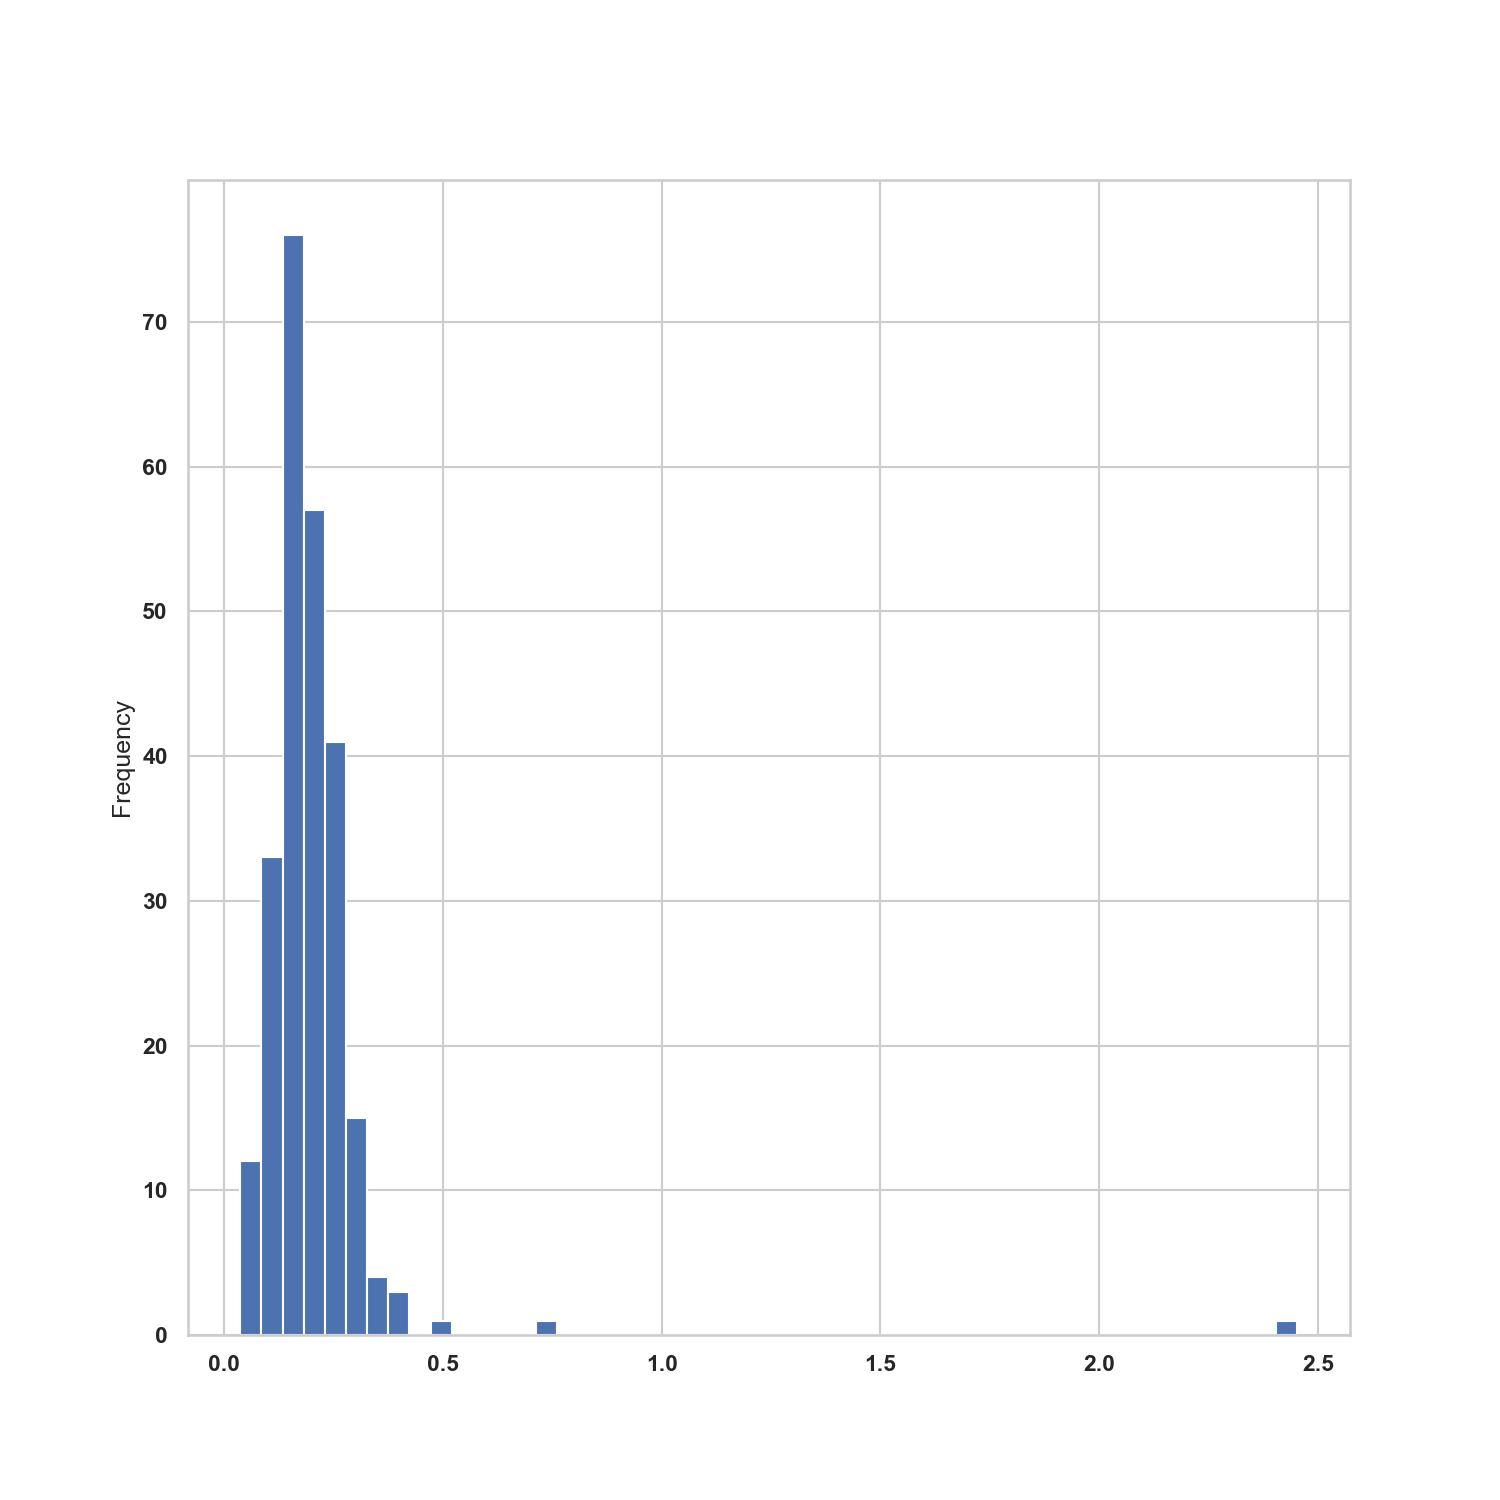

<AxesSubplot:ylabel='Frequency'>

In [104]:
plt.subplots()
tips['tip_pct'].plot.hist(bins=50) # Series의 plot.hist메서드를 통해 전체 결제금액 대비 팁 비율 만들기

In [83]:
tips['tip_pct'].plot.density() # 팁 비율에 대한 밀도 그래프

<AxesSubplot:ylabel='Density'>

In [86]:
comp1=np.random.normal(0,1,size=200)

In [87]:
comp2=np.random.normal(10,2,size=200)

In [88]:
values=pd.Series(np.concatenate([comp1,comp2]))

In [93]:
# sns.displot(values,bins=100,color='k')

* 산포도

<IPython.core.display.Javascript object>


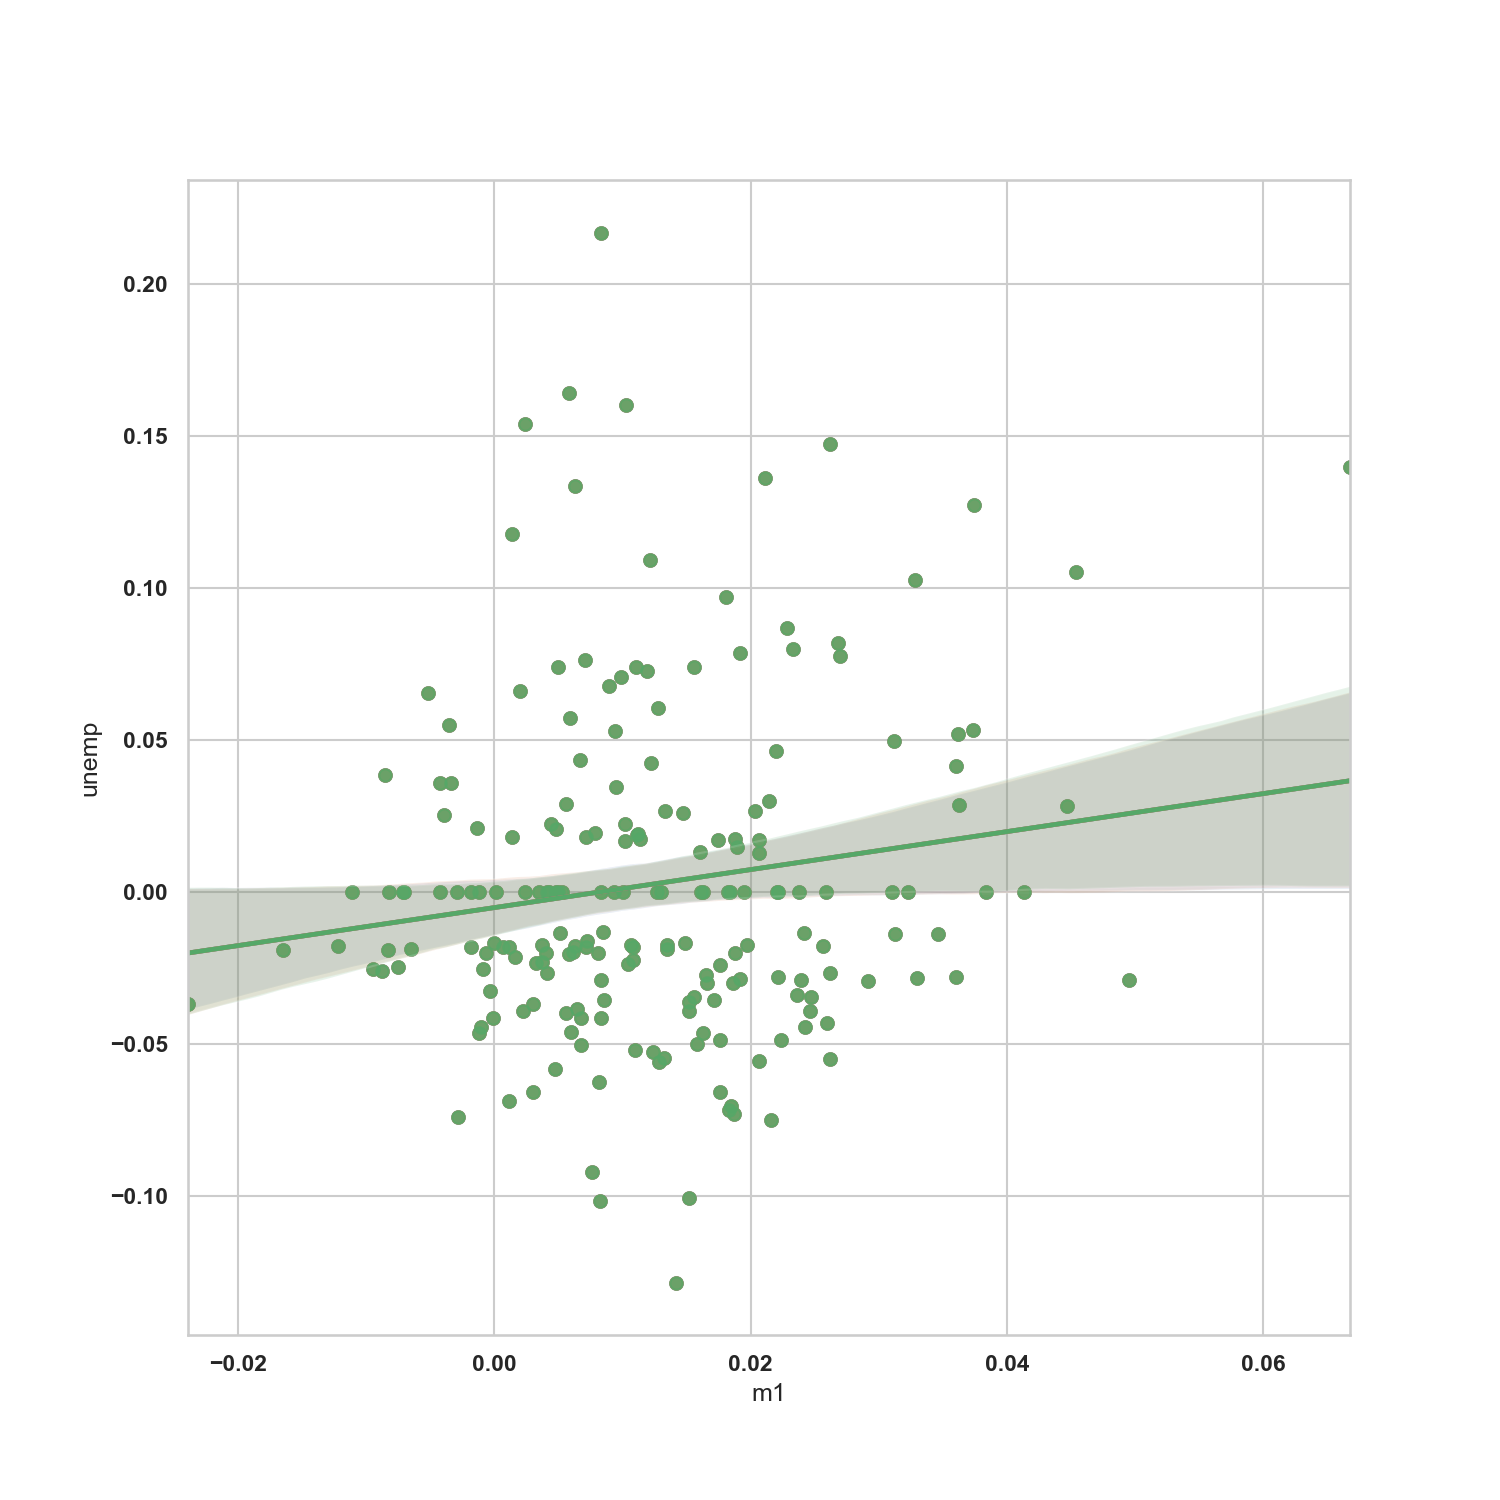

In [108]:
plt.subplots()
macro=pd.read_csv('examples/macrodata.csv')

In [109]:
data=macro[['cpi','m1','tbilrate','unemp']]

In [110]:
trans_data=np.log(data).diff().dropna()

In [111]:
trans_data[-5:]

cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

In [115]:
#sns.regplot('m1','unemp',data=trans_data)

In [103]:
plt.title('Change in log %s versus log %s' %('m1','unemp'))

Text(0.5, 1.0, 'Change in log m1 versus log unemp')

<IPython.core.display.Javascript object>


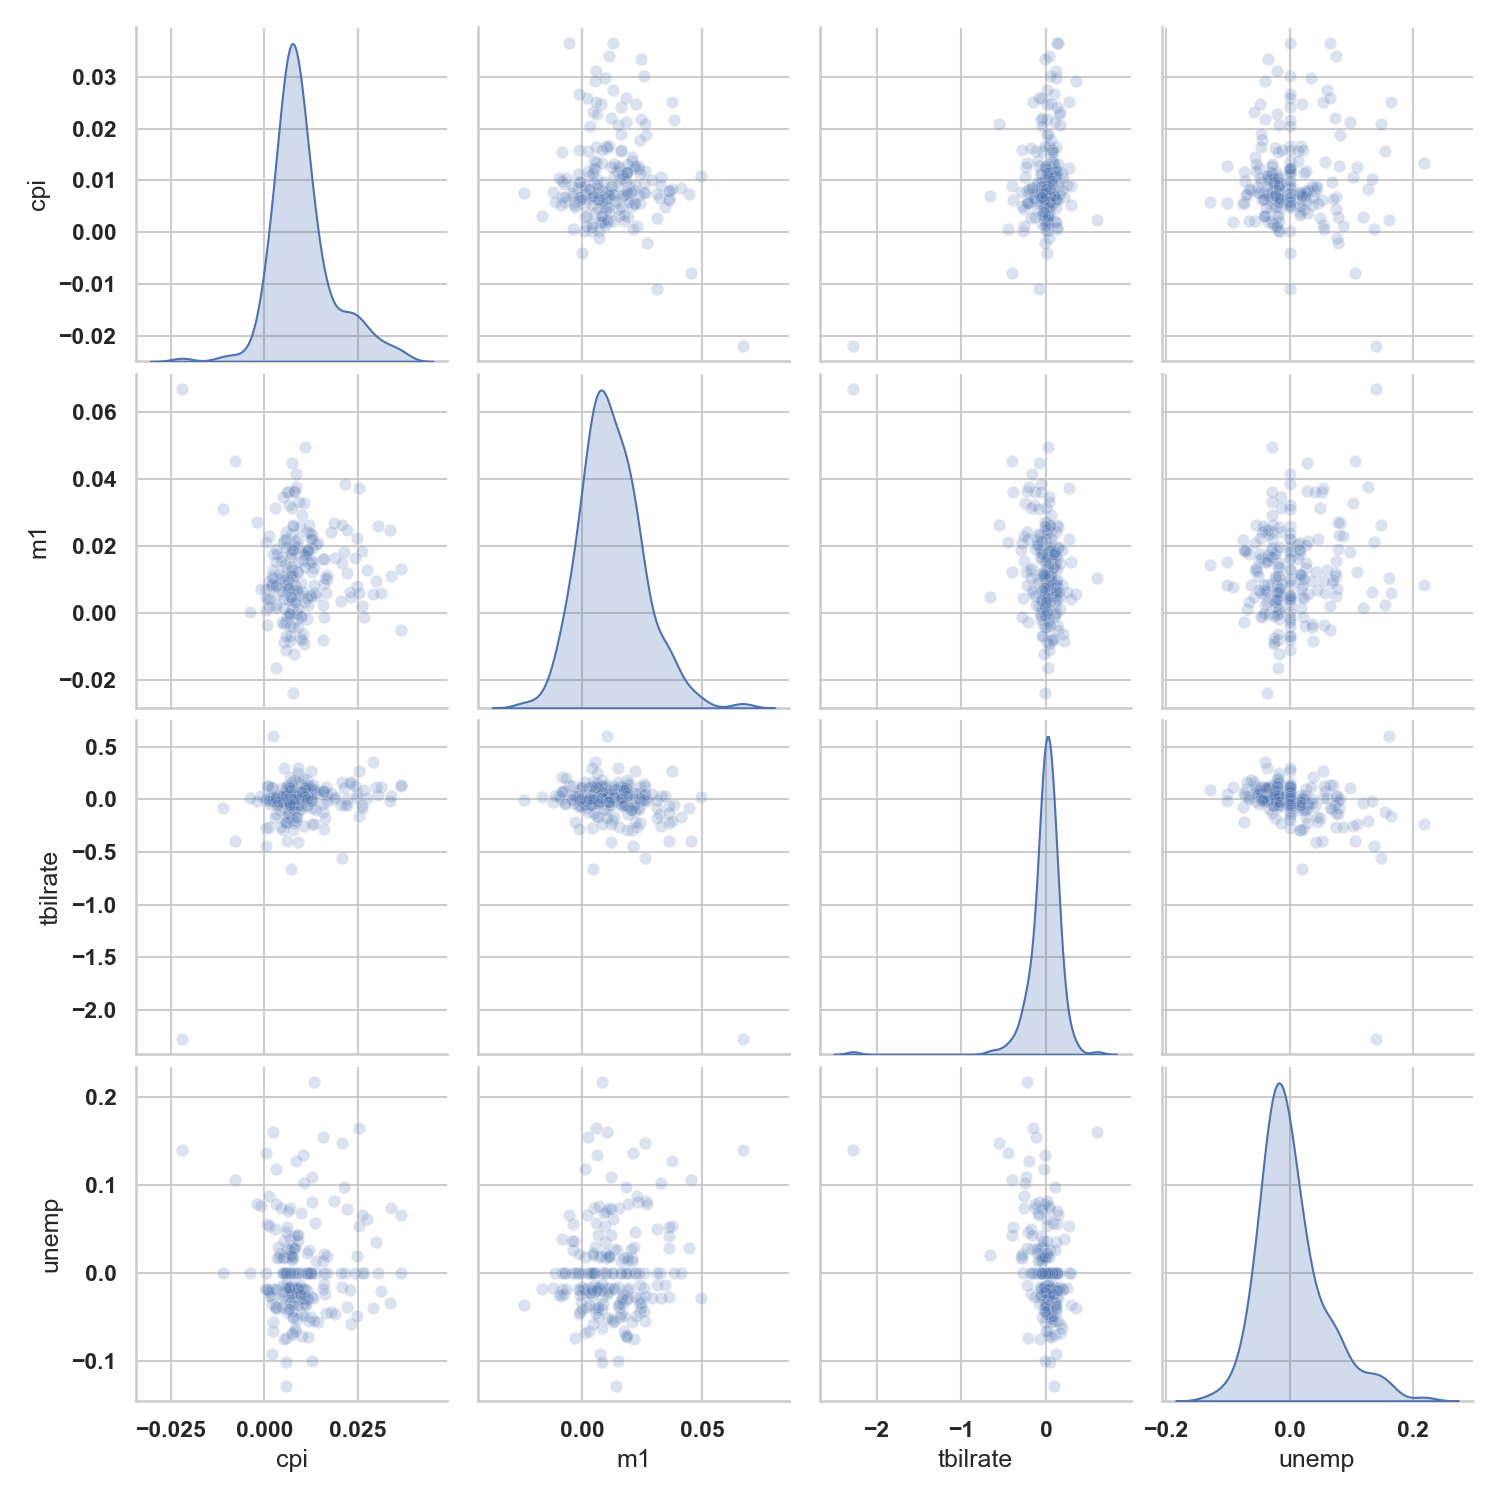

In [116]:
sns.pairplot(trans_data, diag_kind='kde',plot_kws={'alpha':0.2}) # pairplot함수를 통해 대각선을 따라 각 변수에 대한 히스토그램 생성

* 패싯 그리드와 범주형 데이터: 다양한 범주형 값을 가지는 데이터를 시각화하는 방법

<IPython.core.display.Javascript object>


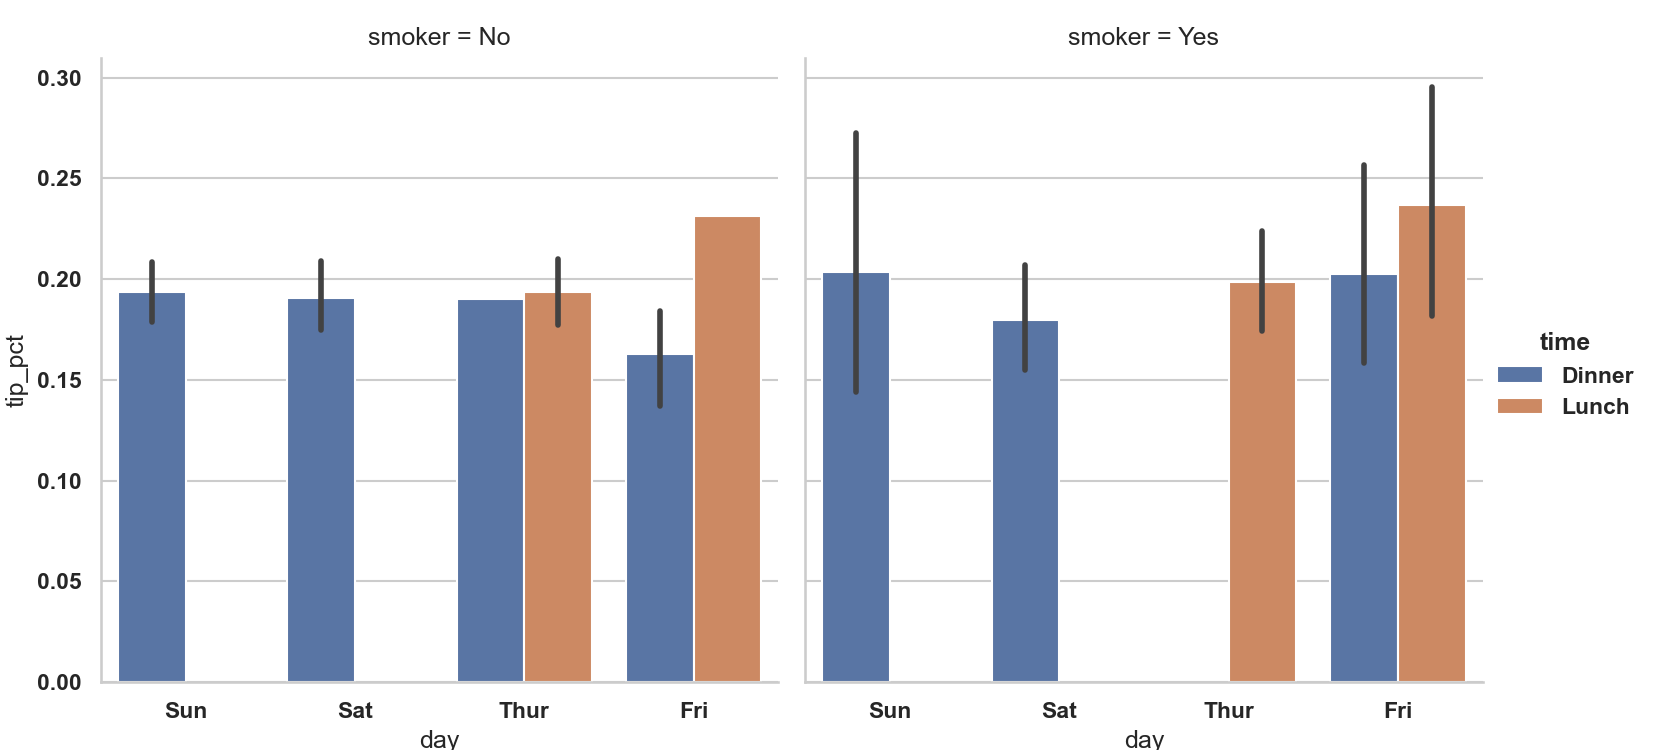

In [125]:
sns.catplot(x='day',y='tip_pct',hue='time',col='smoker',kind='bar',data=tips[tips.tip_pct<1])

<IPython.core.display.Javascript object>


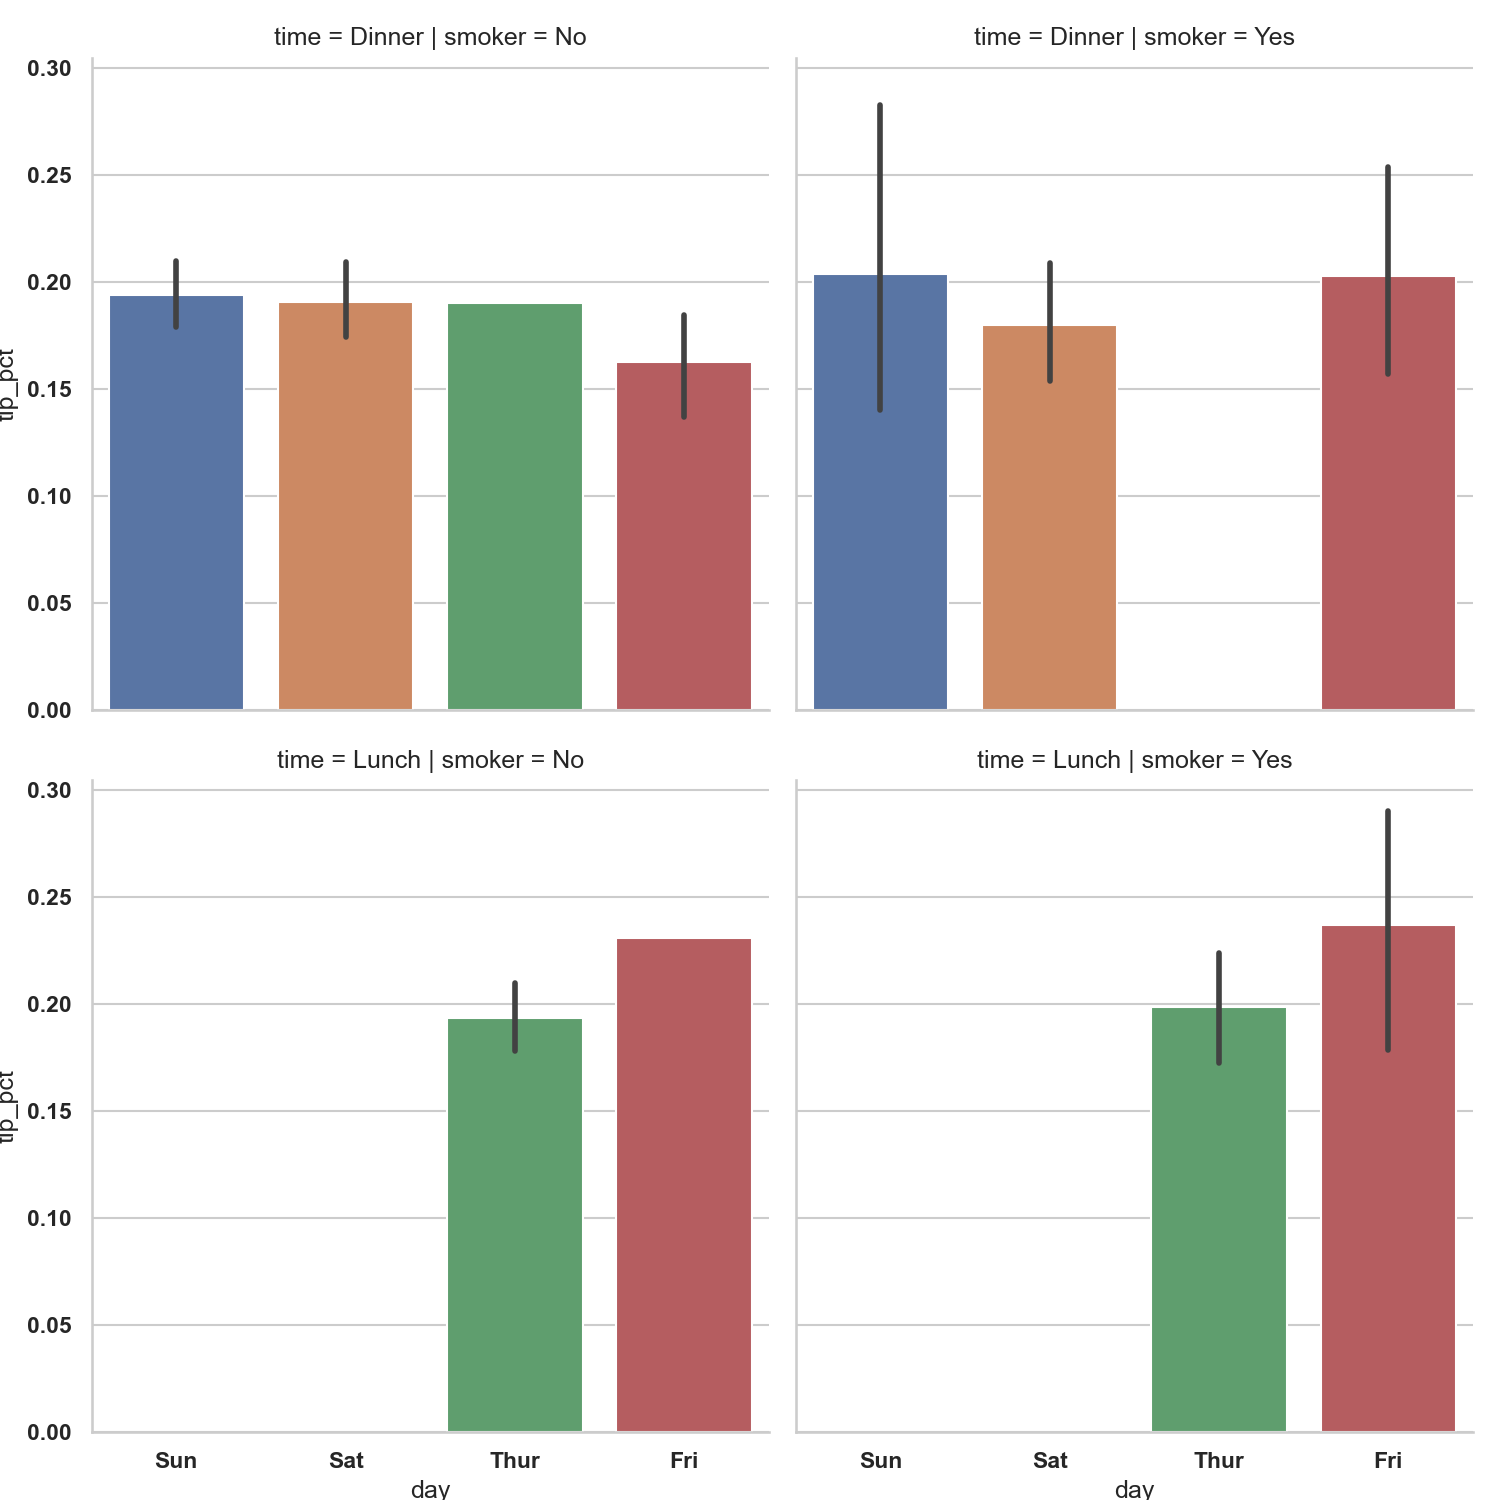

In [124]:
sns.catplot(x='day',y='tip_pct',row='time',col='smoker',kind='bar',data=tips[tips.tip_pct<1])
# 패싯 그리드에 time값에 따른 그래프 추가

<IPython.core.display.Javascript object>


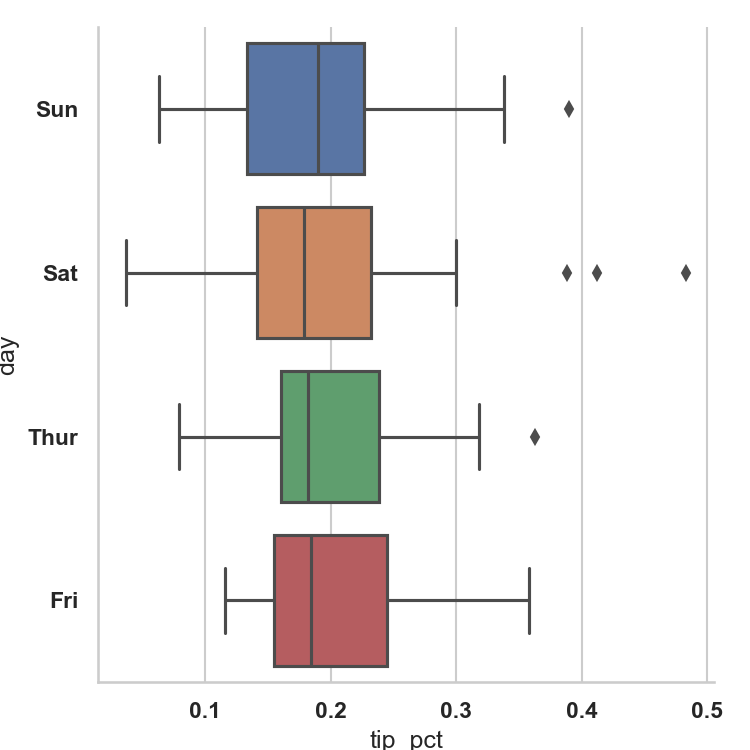

In [123]:
sns.catplot(x='tip_pct',y='day',kind='box',data=tips[tips.tip_pct<0.5])
# 중간값과 사분위 그리고 특잇값을 보여주는 상자그림